In [13]:
df_train = pd.read_csv("df_train.csv")
df_train = df_train.iloc[:,1:]
df_train.tail()

pd.options.display.max_columns = 30 

###  target value 탐색

In [14]:
df_train[["logerror"]].describe()

logerror
count  90275.000000
mean       0.011457
std        0.161079
min       -4.605000
25%       -0.025300
50%        0.006000
75%        0.039200
max        4.737000

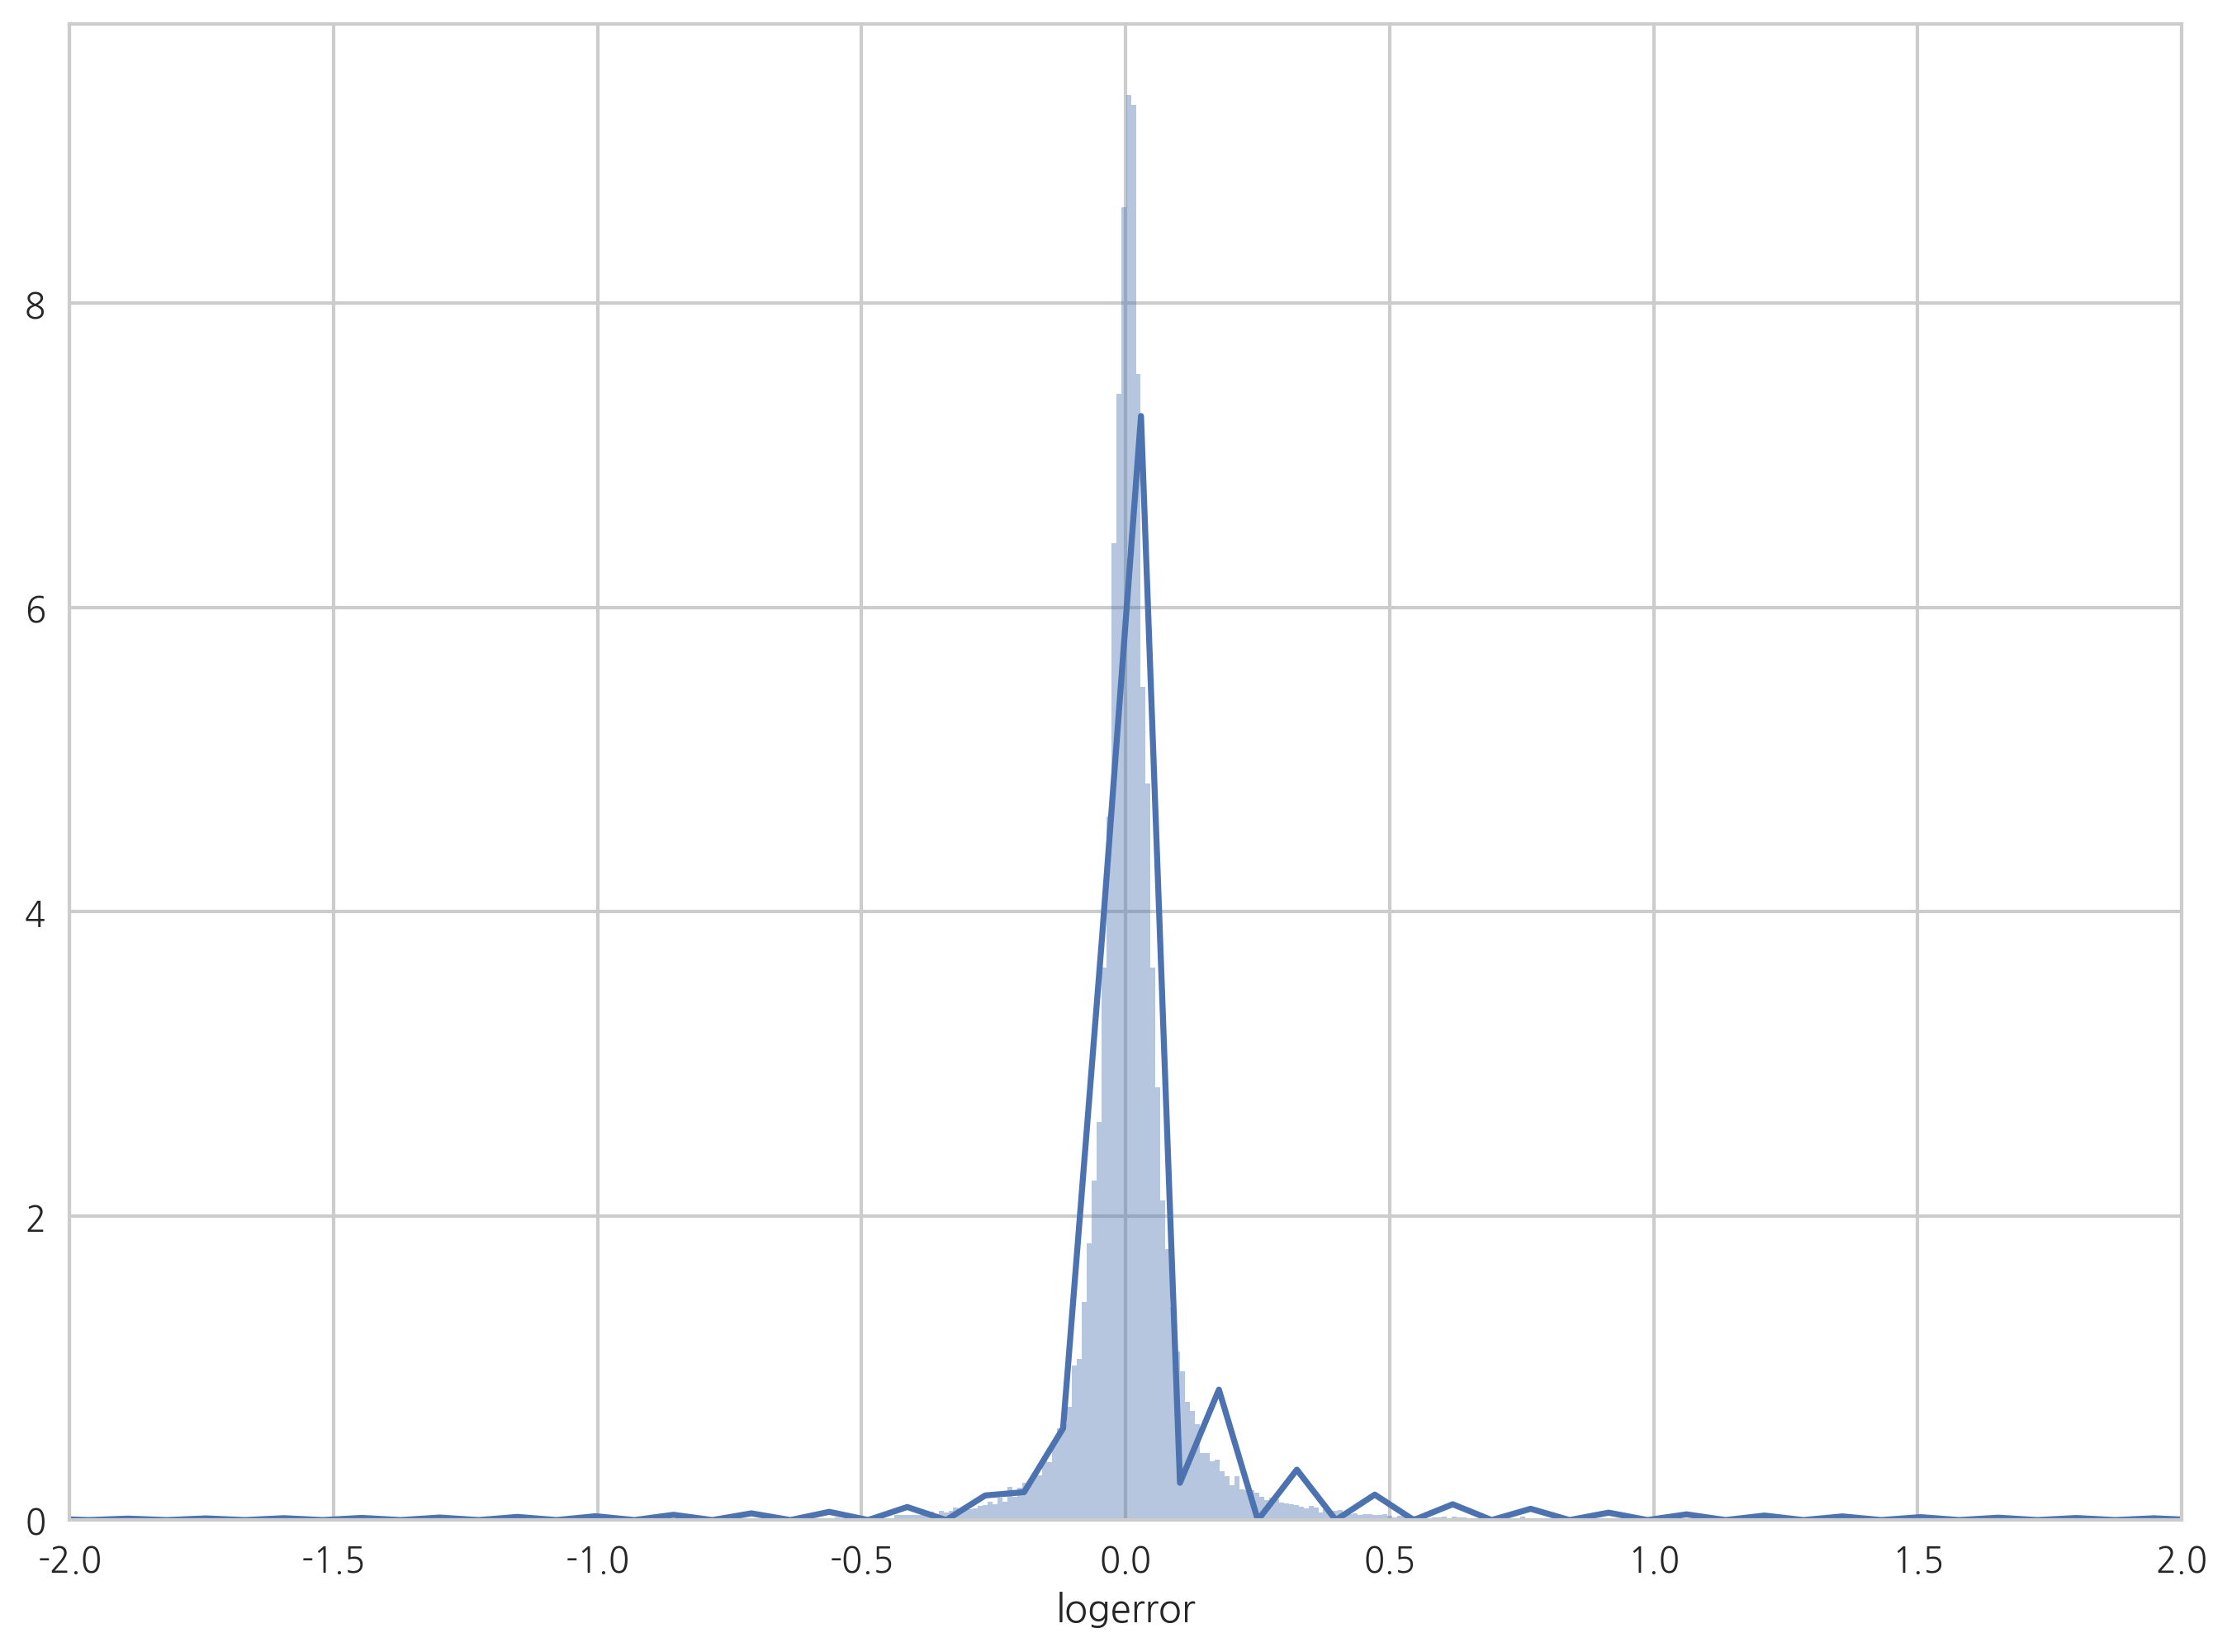

In [15]:
sns.distplot(df_train.logerror, kde=True, bins=1000)
plt.xlim(-2, 2)
plt.show()

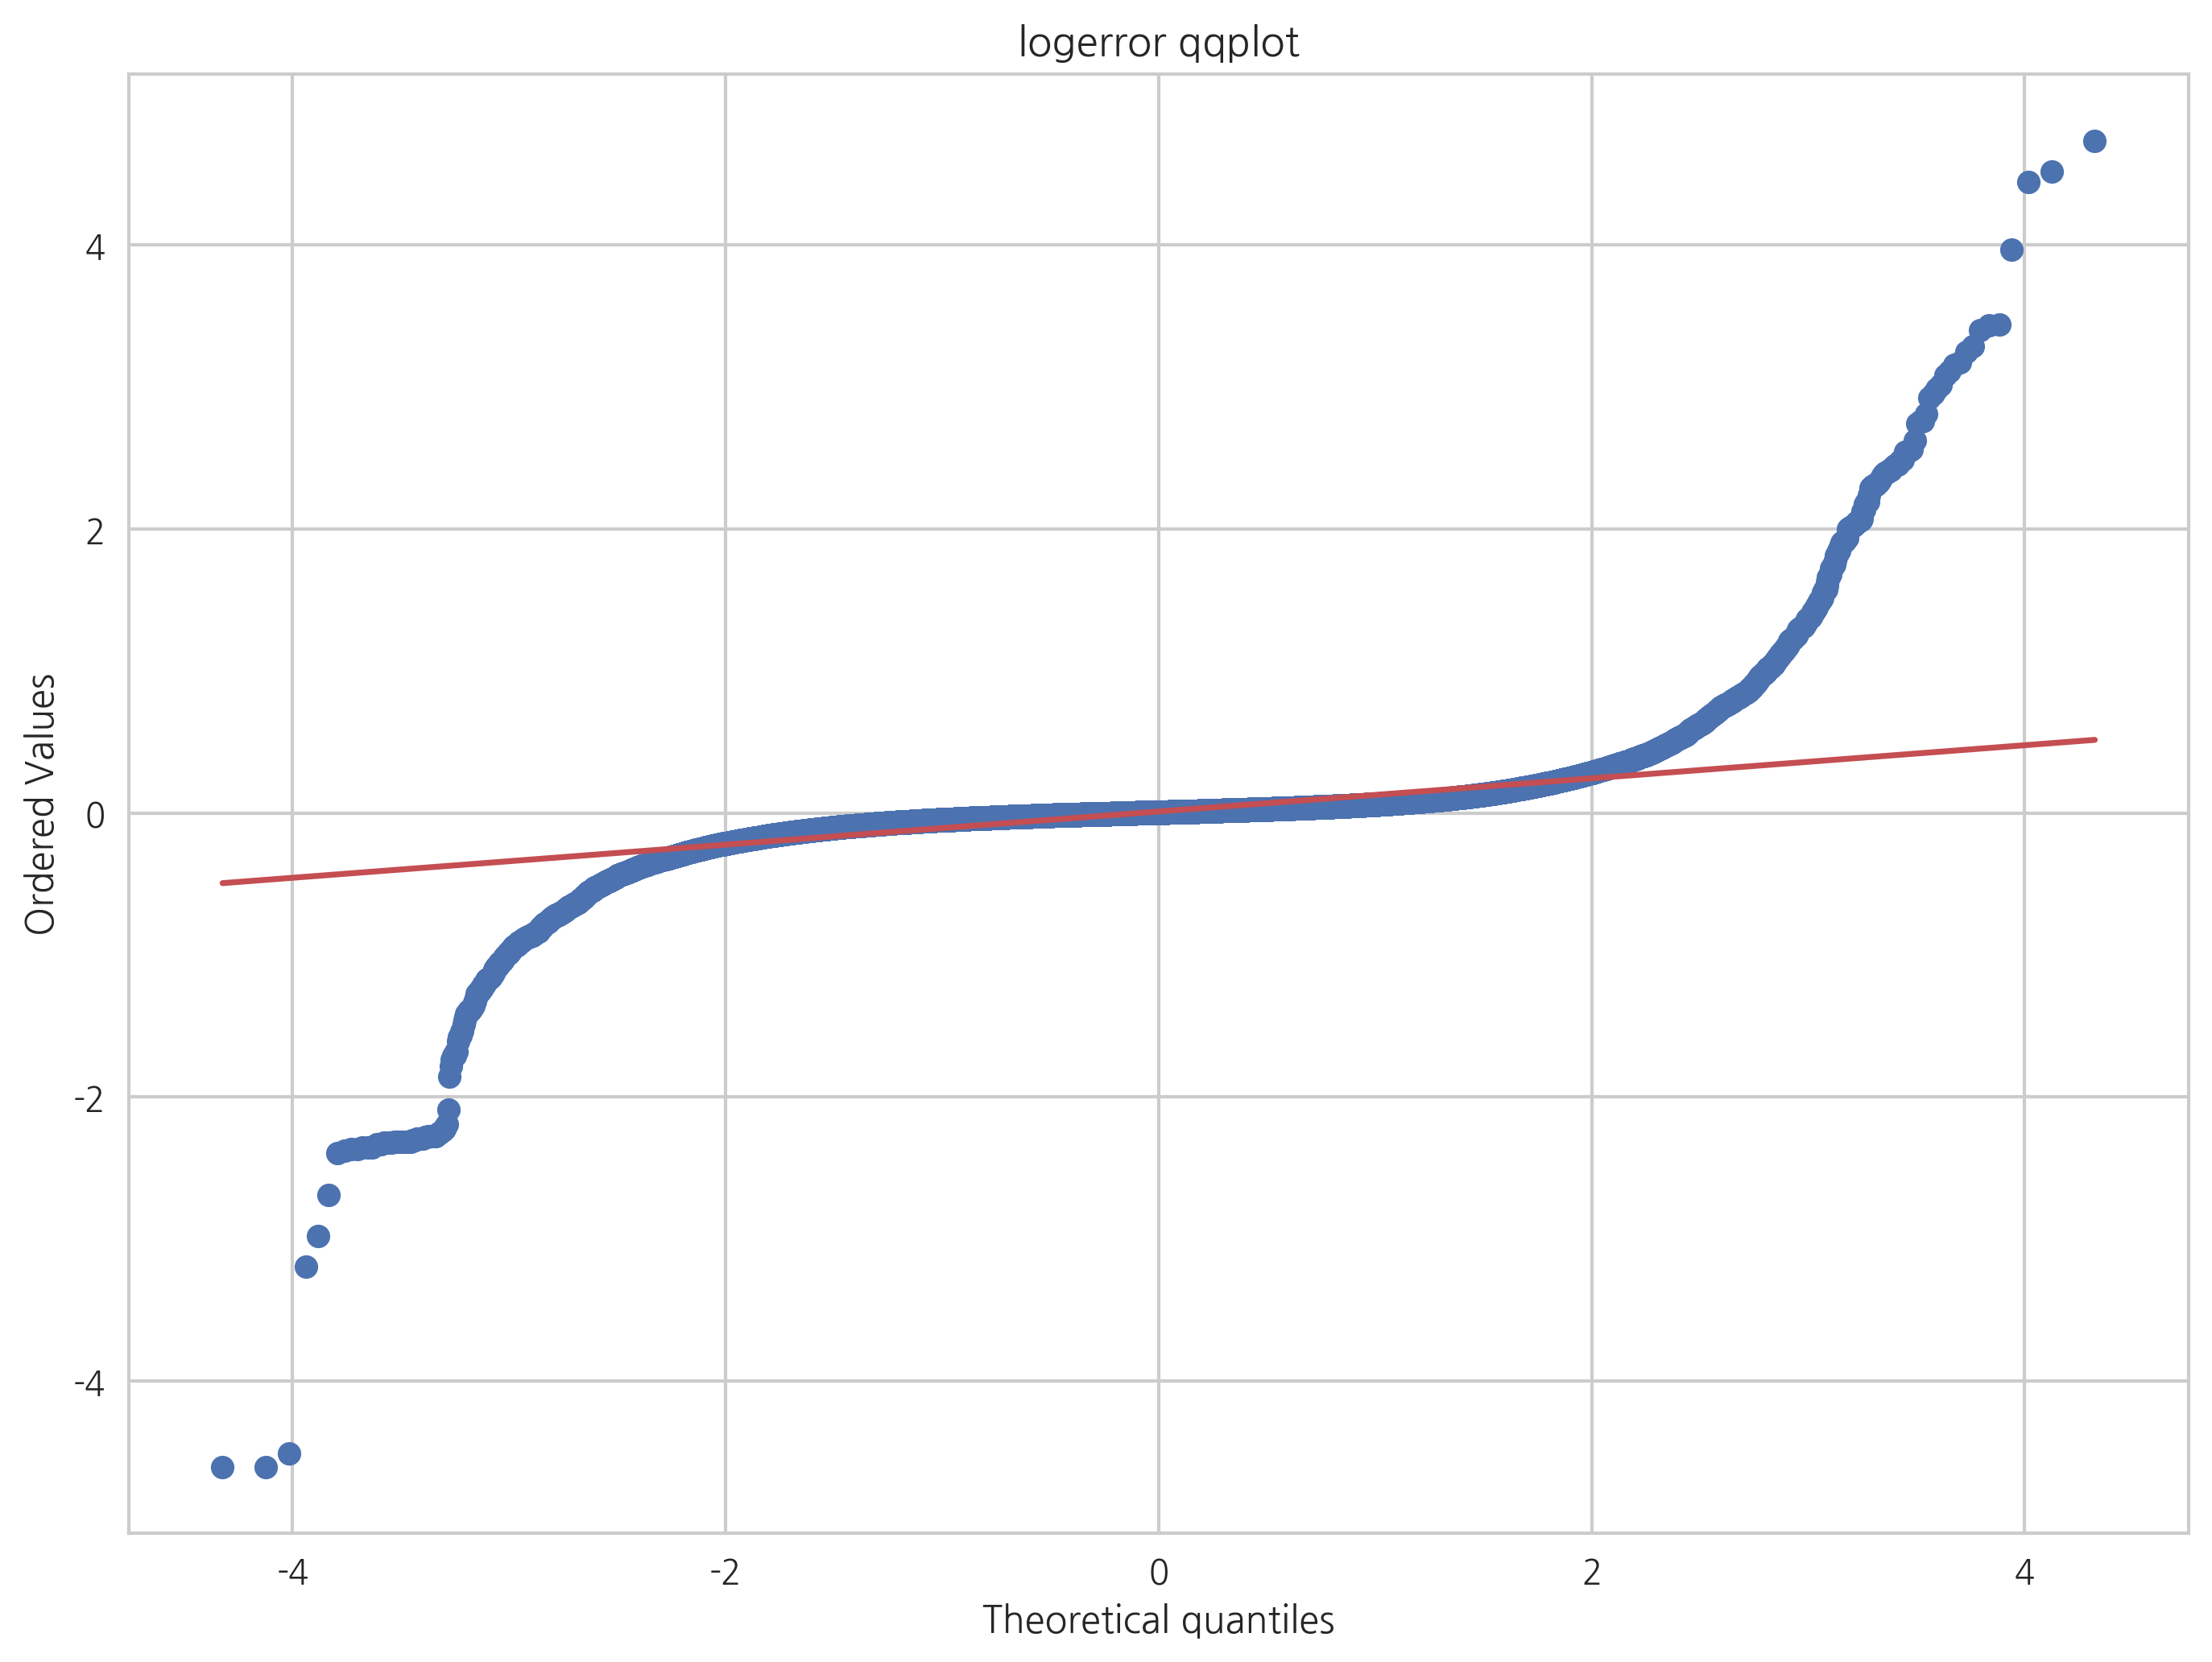

In [16]:
# qqplot 
sp.stats.probplot(df_train.logerror, plot=plt)
plt.title("logerror qqplot")
plt.show()

### transaction date 탐색

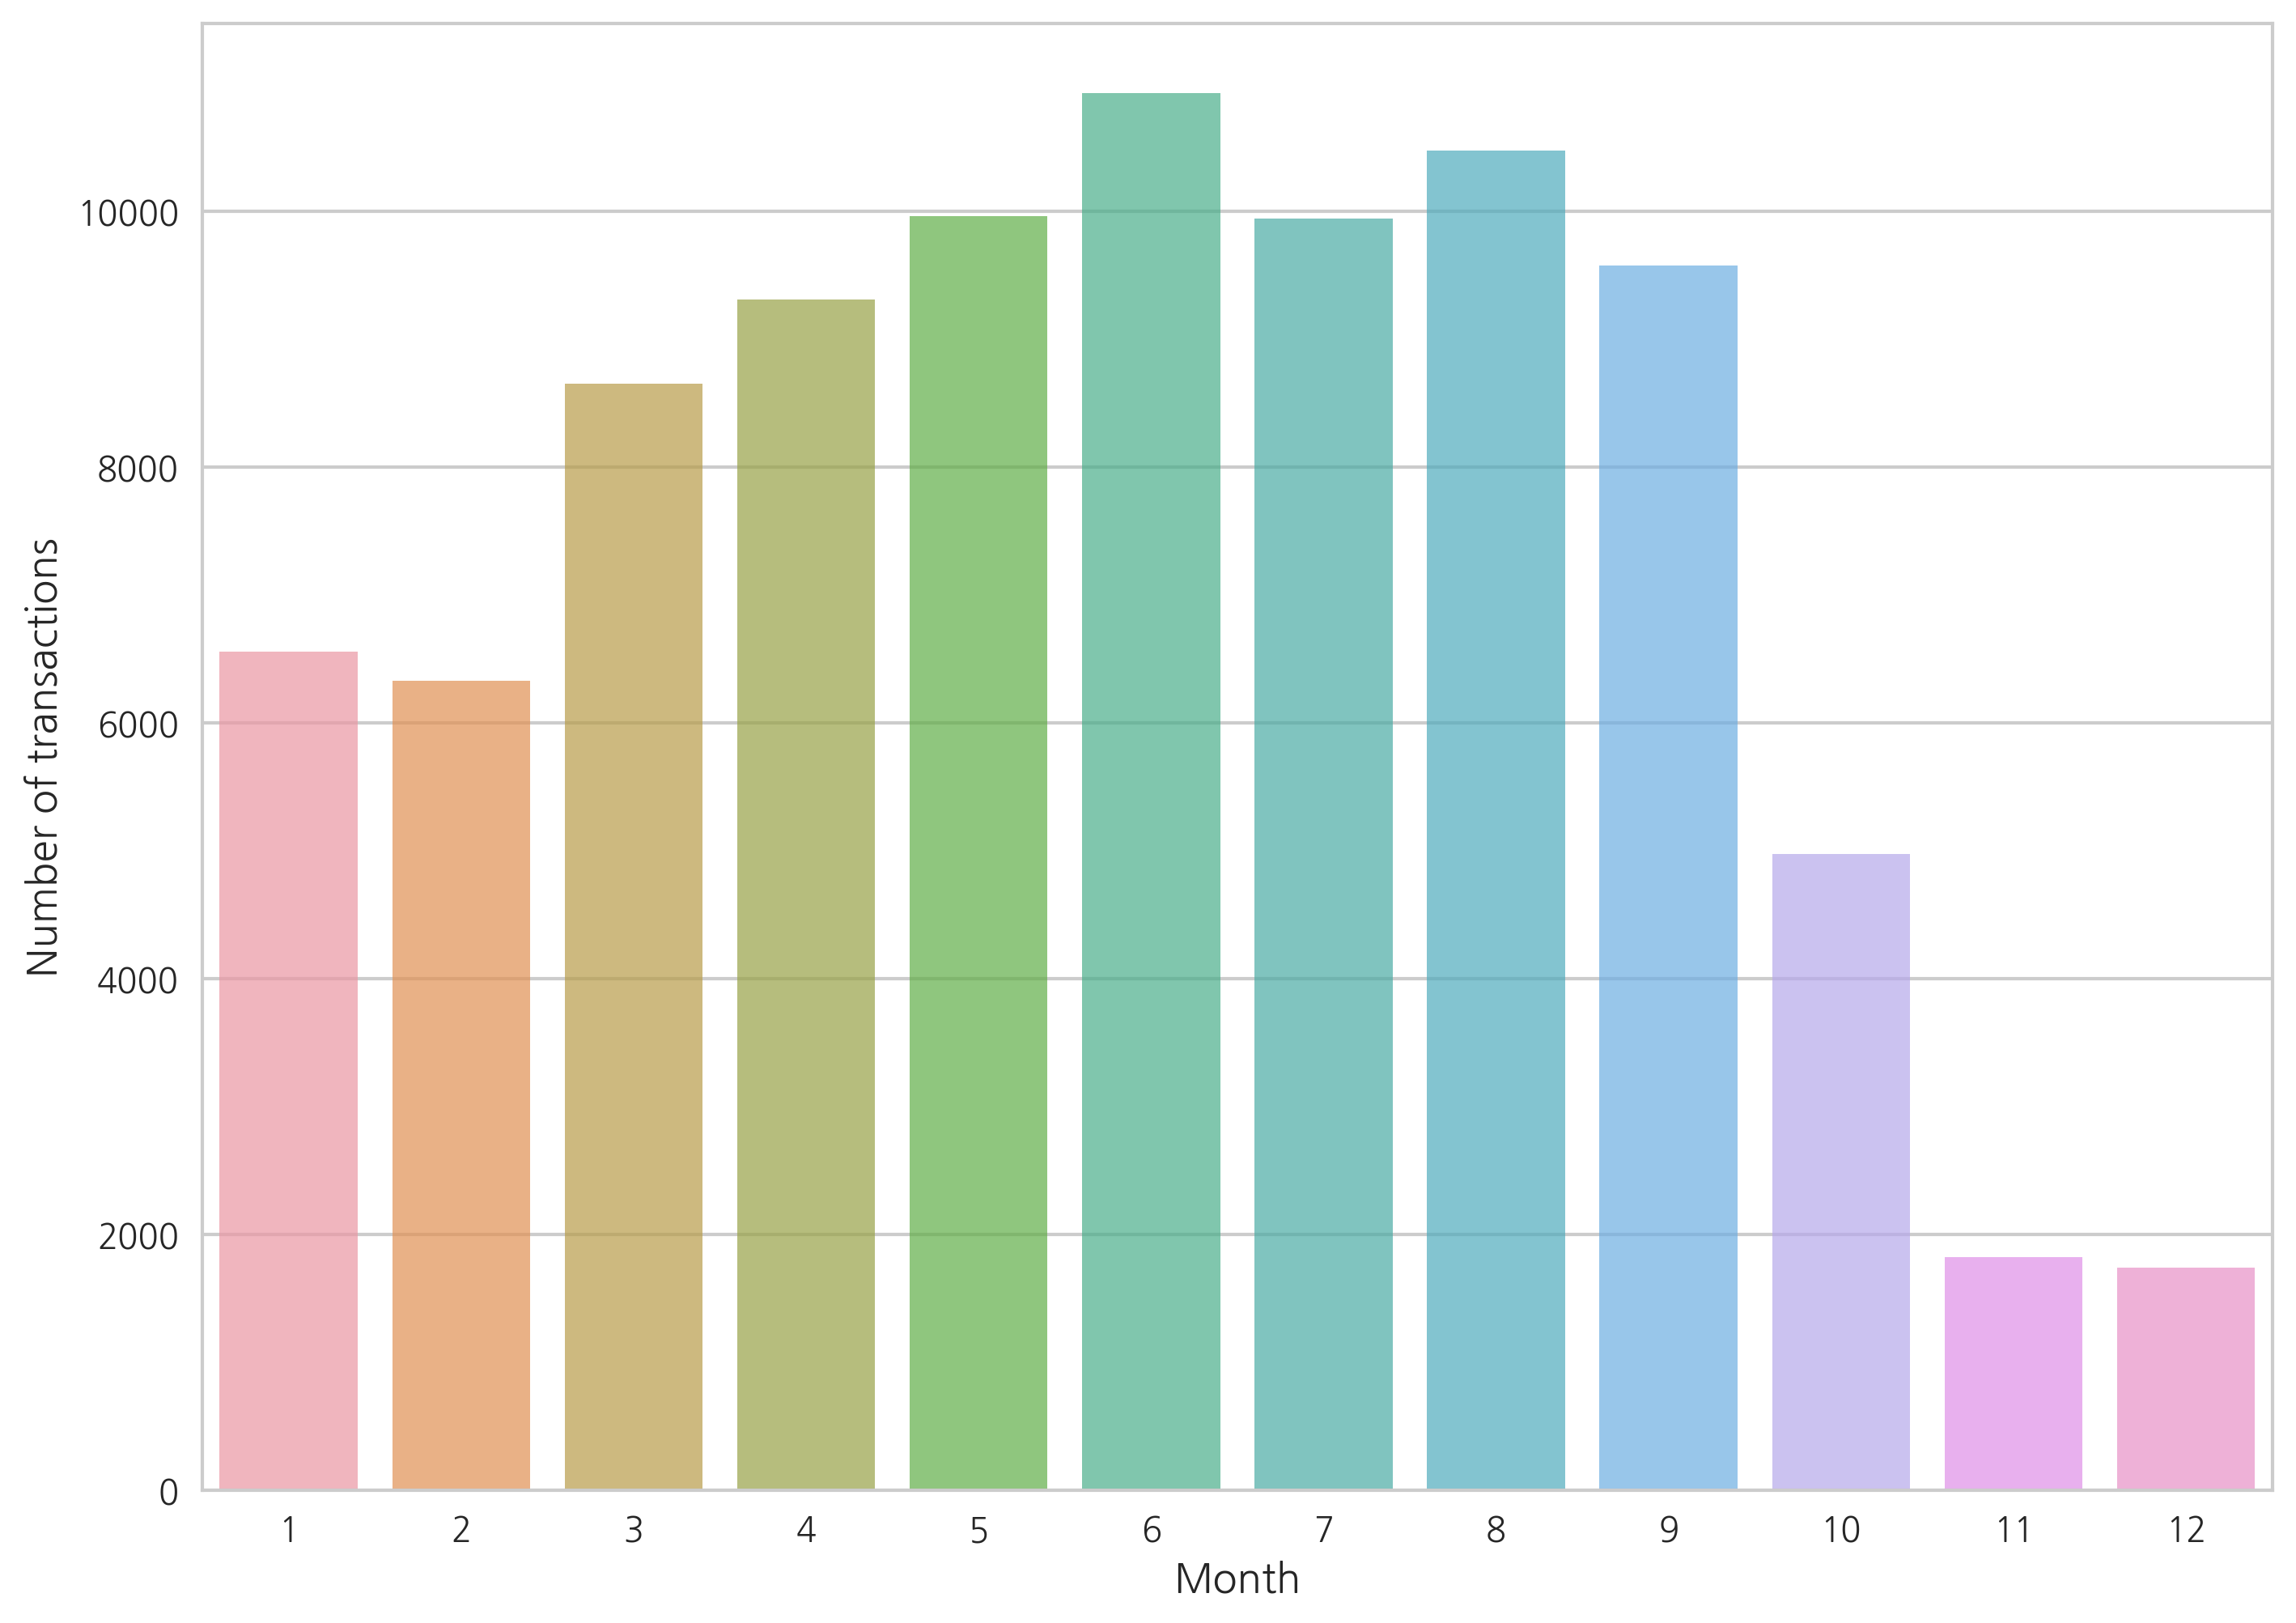

In [17]:
from datetime import datetime
month = [datetime.strptime(x , '%Y-%m-%d').month for x in df_train["transactiondate"]]
month = pd.Series(month)
month_cnt = month.value_counts()
sns.barplot(month_cnt.index, month_cnt.values, alpha=0.7)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Number of transactions", fontsize=12)
plt.show()


### missing value 탐색 

데이터에 missing value 많으므로 어떻게 처리할지에 대한 의논이 필요함

In [18]:
missing_pct = df_train.isnull().sum() / df_train.isnull().count()
df_train.loc["missing_pct"] = missing_pct.round(3)

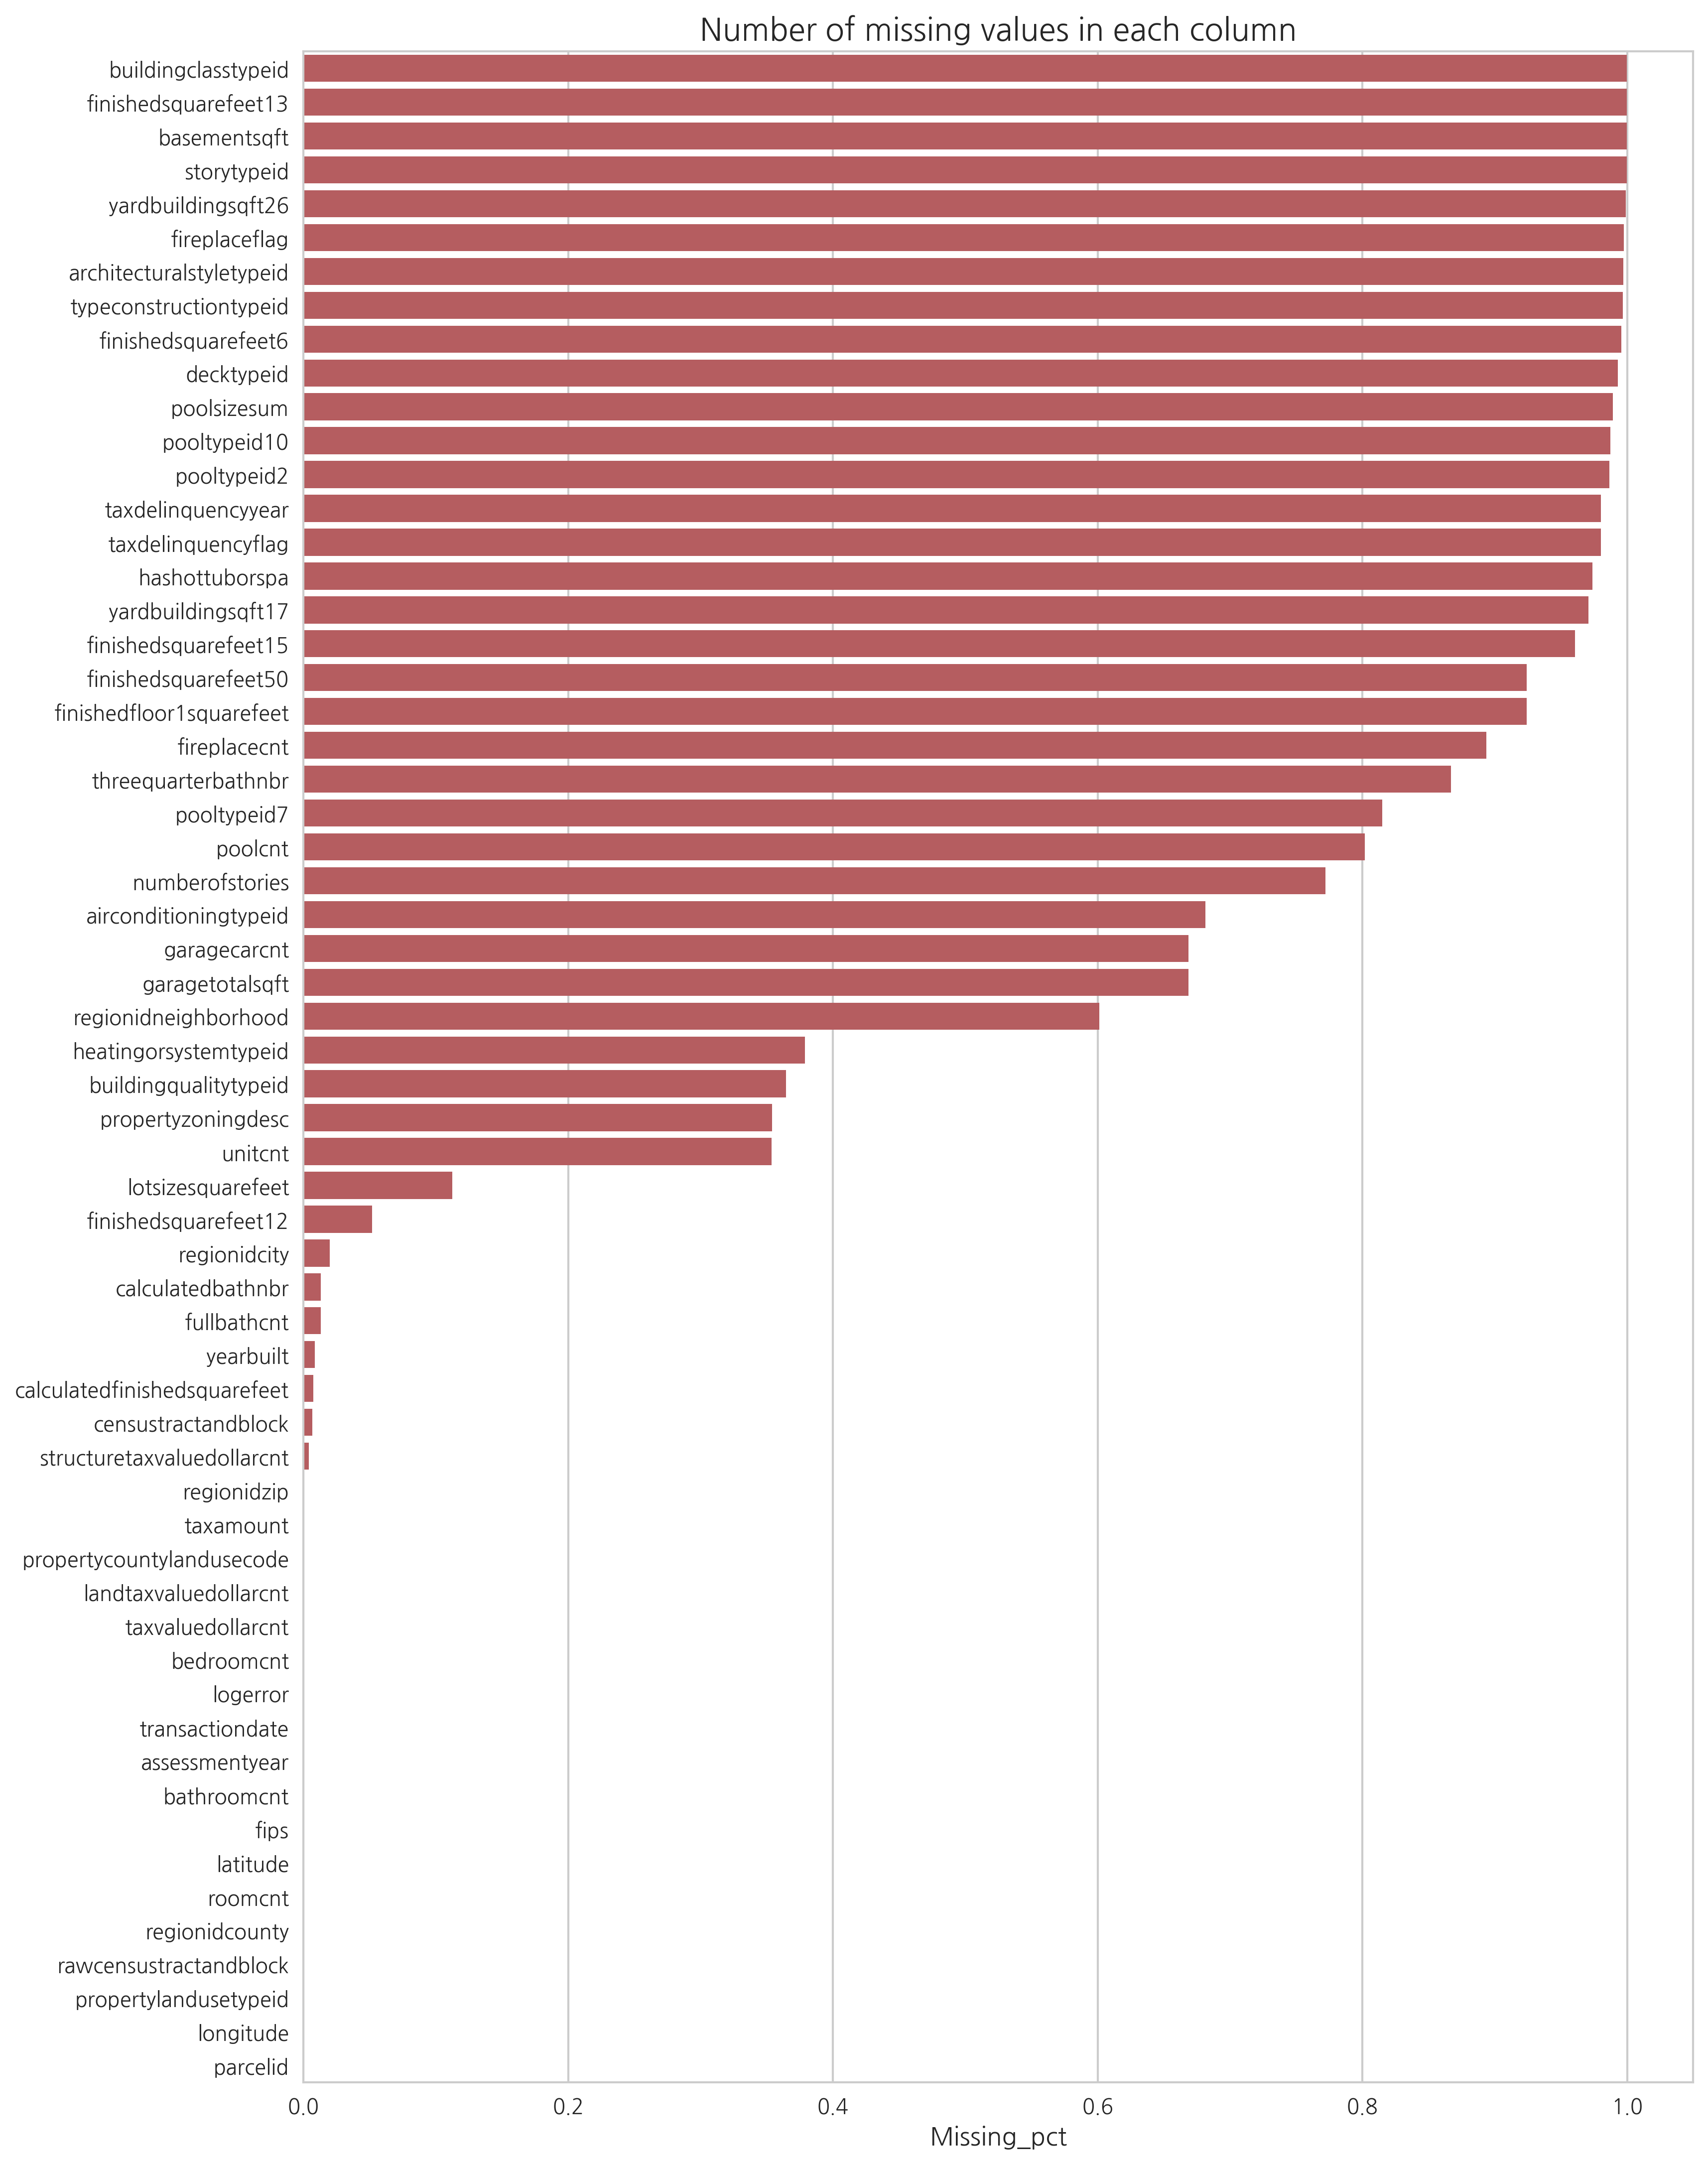

In [19]:
plt.figure(figsize=(12,18))
missing_pct = missing_pct.sort_values(ascending=False)
sns.barplot(y=missing_pct.index, x=missing_pct.values, 
            alpha=1., color="r")
plt.xlabel("Missing_pct", fontsize=12)
plt.title("Number of missing values in each column", fontsize=15)

In [20]:
# missing_pct가 30% 미만인 변수만 살려본다 
df_train2 = df_train.loc[:,df_train.loc["missing_pct"] < 0.3]
df_train2.tail()
print(df_train2.shape)

(90276, 27)


In [21]:
# filling missing values 

# 연속형 변수는 평균으로 대체 
missing_feature1 = ["calculatedbathnbr", "calculatedfinishedsquarefeet", "finishedsquarefeet12",
                  "fullbathcnt", "lotsizesquarefeet", "structuretaxvaluedollarcnt", "taxvaluedollarcnt",
                   "landtaxvaluedollarcnt", "taxamount"]
for x in missing_feature1:
    df_train2[x].fillna(df_train2[x].mean(), inplace=True)

# 카테고리 변수는 최빈값으로 
missing_feature2 = ["regionidcity", "censustractandblock", "regionidzip", "propertycountylandusecode"]
for x in missing_feature2:
    df_train2[x].fillna(df_train2[x].mode()[0], inplace=True)
    
# yearbuilt는 일단 보류 

df_train2.isnull().sum()

/home/dockeruser/anaconda2/lib/python2.7/site-packages/pandas/core/generic.py:3295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


parcelid                          0
logerror                          0
transactiondate                   0
bathroomcnt                       0
bedroomcnt                        0
calculatedbathnbr                 0
calculatedfinishedsquarefeet      0
finishedsquarefeet12              0
fips                              0
fullbathcnt                       0
latitude                          0
longitude                         0
lotsizesquarefeet                 0
propertycountylandusecode         0
propertylandusetypeid             0
rawcensustractandblock            0
regionidcity                      0
regionidcounty                    0
regionidzip                       0
roomcnt                           0
yearbuilt                       756
structuretaxvaluedollarcnt        0
taxvaluedollarcnt                 0
assessmentyear                    0
landtaxvaluedollarcnt             0
taxamount                         0
censustractandblock               0
dtype: int64

In [10]:
# 남은 데이터에서 결측값이 있는 row는 날려보자 
df_train3 = df_train2.dropna()
print(df_train3.shape)
df_train3.tail(10)

(89520, 27)


parcelid  logerror transactiondate  bathroomcnt  bedroomcnt  \
90266        12265636.0   -0.0030      2016-12-30          2.0         4.0   
90267        17109680.0    0.0010      2016-12-30          2.0         4.0   
90268        12268527.0   -0.0151      2016-12-30          3.0         3.0   
90269        12920746.0    0.0344      2016-12-30          2.0         3.0   
90270        10774160.0   -0.0356      2016-12-30          1.0         1.0   
90271        12046695.0    0.0070      2016-12-30          3.0         3.0   
90272        12995401.0   -0.2679      2016-12-30          2.0         4.0   
90273        11402105.0    0.0602      2016-12-30          2.0         2.0   
90274        12566293.0    0.4207      2016-12-30          1.0         3.0   
missing_pct         0.0    0.0000               0          0.0         0.0   

             calculatedbathnbr  calculatedfinishedsquarefeet  \
90266                    2.000                      1496.000   
90267                    2.000                      1830.000   
90268                    3.000                      2438.000   
90269                    2.000                      1448.000   
90270                    1.000                       653.000   
90271                    3.000                      2856.000   
90272                    2.000                      2617.000   
90273                    2.000                      1034.000   
90274                    1.000                      1524.000   
missing_pct              0.013                         0.007   

             finishedsquarefeet12    fips  fullbathcnt    latitude  \
90266                  1745.43414  6037.0        2.000  33898700.0   
90267                  1830.00000  6111.0        2.000  34268916.0   
90268                  2438.00000  6037.0        3.000  33916972.0   
90269                  1448.00000  6037.0        2.000  34098870.0   
90270                   653.00000  6037.0        1.000  34203000.0   
90271                  2856.00000  6037.0        3.000  34198744.0   
90272                  1745.43414  6037.0        2.000  34075655.0   
90273                  1034.00000  6037.0        2.000  33963900.0   
90274                  1524.00000  6037.0        1.000  33838933.0   
missing_pct               0.05200     0.0        0.013         0.0   

               longitude  lotsizesquarefeet propertycountylandusecode  \
90266       -118241735.0           4900.000                      0200   
90267       -119180737.0           6402.000                      1111   
90268       -118240900.0           5001.000                      0100   
90269       -117875148.0           7594.000                      0100   
90270       -118562000.0          93676.000                      010C   
90271       -118224849.0           9343.000                      0100   
90272       -118025537.0           6865.000                      0200   
90273       -118367000.0          20033.000                      010C   
90274       -118219093.0           5124.000                      0100   
missing_pct          0.0              0.112                         0   

             propertylandusetypeid  rawcensustractandblock  regionidcity  \
90266                        246.0            6.037543e+07      24174.00   
90267                        261.0            6.111002e+07      34543.00   
90268                        261.0            6.037541e+07      24174.00   
90269                        261.0            6.037404e+07      24245.00   
90270                        266.0            6.037132e+07      12447.00   
90271                        261.0            6.037301e+07      45457.00   
90272                        246.0            6.037433e+07      51861.00   
90273                        266.0            6.037601e+07      45888.00   
90274                        261.0            6.037544e+07      12447.00   
missing_pct                    0.0            0.000000e+00          0.02   

             regionidcounty  regionidzi

In [11]:
# 회귀 분석을 위해 id 칼럼 삭제 
df_train3 = df_train3.drop("missing_pct")
df_train3 = df_train3.drop("parcelid", axis=1)
df_train3.tail(10)

logerror transactiondate  bathroomcnt  bedroomcnt  calculatedbathnbr  \
90265   -0.3769      2016-12-30          1.0         2.0                1.0   
90266   -0.0030      2016-12-30          2.0         4.0                2.0   
90267    0.0010      2016-12-30          2.0         4.0                2.0   
90268   -0.0151      2016-12-30          3.0         3.0                3.0   
90269    0.0344      2016-12-30          2.0         3.0                2.0   
90270   -0.0356      2016-12-30          1.0         1.0                1.0   
90271    0.0070      2016-12-30          3.0         3.0                3.0   
90272   -0.2679      2016-12-30          2.0         4.0                2.0   
90273    0.0602      2016-12-30          2.0         2.0                2.0   
90274    0.4207      2016-12-30          1.0         3.0                1.0   

       calculatedfinishedsquarefeet  finishedsquarefeet12    fips  \
90265                         860.0             860.00000  6037.0   
90266                        1496.0            1745.43414  6037.0   
90267                        1830.0            1830.00000  6111.0   
90268                        2438.0            2438.00000  6037.0   
90269                        1448.0            1448.00000  6037.0   
90270                         653.0             653.00000  6037.0   
90271                        2856.0            2856.00000  6037.0   
90272                        2617.0            1745.43414  6037.0   
90273                        1034.0            1034.00000  6037.0   
90274                        1524.0            1524.00000  6037.0   

       fullbathcnt    latitude    longitude  lotsizesquarefeet  \
90265          1.0  34154600.0 -118260000.0       29109.800873   
90266          2.0  33898700.0 -118241735.0        4900.000000   
90267          2.0  34268916.0 -119180737.0        6402.000000   
90268          3.0  33916972.0 -118240900.0        5001.000000   
90269          2.0  34098870.0 -117875148.0        7594.000000   
90270          1.0  34203000.0 -118562000.0       93676.000000   
90271          3.0  34198744.0 -118224849.0        9343.000000   
90272          2.0  34075655.0 -118025537.0        6865.000000   
90273          2.0  33963900.0 -118367000.0       20033.000000   
90274          1.0  33838933.0 -118219093.0        5124.000000   

      propertycountylandusecode  propertylandusetypeid  \
90265                      010C                  266.0   
90266                      0200                  246.0   
90267                      1111                  261.0   
90268                      0100                  261.0   
90269                      0100                  261.0   
90270                      010C                  266.0   
90271                      0100                  261.0   
90272                      0200                  246.0   
90273                      010C                  266.0   
90274                      0100                  261.0   

       rawcensustractandblock  regionidcity  regionidcounty  regionidzip  \
90265            6.037302e+07       45457.0          3101.0      96322.0   
90266            6.037543e+07       24174.0          3101.0      96090.0   
90267            6.111002e+07       34543.0          2061.0      97084.0   
90268            6.037541e+07       24174.0          3101.0      96092.0   
90269            6.037404e+07       24245.0          3101.0      96473.0   
90270            6.037132e+07       12447.0          3101.0      96364.0   
90271            6.037301e+07       45457.0          3101.0      96327.0   
90272            6.037433e+07       51861.0          3101.0      96478.0   
90273            6.037601e+07       45888.0          3101.0      96133.0   
90274            6.037544e+07       12447.0          3101.0      96244.0   

       roomcnt  yearbuilt  structuretaxvaluedollarcnt  taxvaluedollarcnt  \
90265      0.0     2012.0                    106689.0           266825.0   
90266      0.0     195

### 데이터의 유형 알아보기

In [12]:
# 대부분 float로 되어 있지만 실제로는 카테고리 데이터가 많이 존재한다. 타입을 변환시켜줘야함 
df_dtype = df_train3.dtypes.reset_index()
df_dtype.columns = ["name", "type"]
df_dtype

name     type
0                       logerror  float64
1                transactiondate   object
2                    bathroomcnt  float64
3                     bedroomcnt  float64
4              calculatedbathnbr  float64
5   calculatedfinishedsquarefeet  float64
6           finishedsquarefeet12  float64
7                           fips  float64
8                    fullbathcnt  float64
9                       latitude  float64
10                     longitude  float64
11             lotsizesquarefeet  float64
12     propertycountylandusecode   object
13         propertylandusetypeid  float64
14        rawcensustractandblock  float64
15                  regionidcity  float64
16                regionidcounty  float64
17                   regionidzip  float64
18                       roomcnt  float64
19                     yearbuilt  float64
20    structuretaxvaluedollarcnt  float64
21             taxvaluedollarcnt  float64
22                assessmentyear  float64
23         landtaxvaluedollarcnt  float64
24                     taxamount  float64
25           censustractandblock  float64

In [13]:
# 일단 리스트에 numeric과 category 변수를 각각 넣어둠 
# target = logerror
numeric = ["bathroomcnt", "bedroomcnt", "calculatedbathnbr", "calculatedfinishedsquarefeet",
          "finishedsquarefeet12", "fullbathcnt", "latitude", "longitude",
          "lotsizesquarefeet", "roomcnt", "structuretaxvaluedollarcnt",
          "taxvaluedollarcnt", "landtaxvaluedollarcnt","taxamount"]
category = ["transactiondate", "fips", "propertycountylandusecode", 
           "propertylandusetypeid", "rawcensustractandblock",
           "regionidcity", "regionidcounty", "regionidzip", "yearbuilt",
           "assessmentyear", "censustractandblock"]

In [14]:
# 카테고리 변수 변환 
for x in category:
    df_train3[x] = df_train3[x].astype(str)
    
df_dtype = df_train3.dtypes.reset_index()
df_dtype.columns = ["name", "type"]
df_dtype

name     type
0                       logerror  float64
1                transactiondate   object
2                    bathroomcnt  float64
3                     bedroomcnt  float64
4              calculatedbathnbr  float64
5   calculatedfinishedsquarefeet  float64
6           finishedsquarefeet12  float64
7                           fips   object
8                    fullbathcnt  float64
9                       latitude  float64
10                     longitude  float64
11             lotsizesquarefeet  float64
12     propertycountylandusecode   object
13         propertylandusetypeid   object
14        rawcensustractandblock   object
15                  regionidcity   object
16                regionidcounty   object
17                   regionidzip   object
18                       roomcnt  float64
19                     yearbuilt   object
20    structuretaxvaluedollarcnt  float64
21             taxvaluedollarcnt  float64
22                assessmentyear   object
23         landtaxvaluedollarcnt  float64
24                     taxamount  float64
25           censustractandblock   object

In [15]:
df_train3.shape

(89519, 26)

In [21]:
Y = df_train3.iloc[:, 0]
Y = pd.DataFrame(Y, columns=["logerror"])
X = df_train3.iloc[:, 1:]

model = sm.OLS.from_formula("logerror ~ taxamount", data=df_train3)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:               logerror   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     3.947
Date:                Thu, 29 Jun 2017   Prob (F-statistic):             0.0469
Time:                        10:59:46   Log-Likelihood:                 37214.
No. Observations:               89519   AIC:                        -7.442e+04
Df Residuals:                   89517   BIC:                        -7.440e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0124      0.001     17.492      0.0

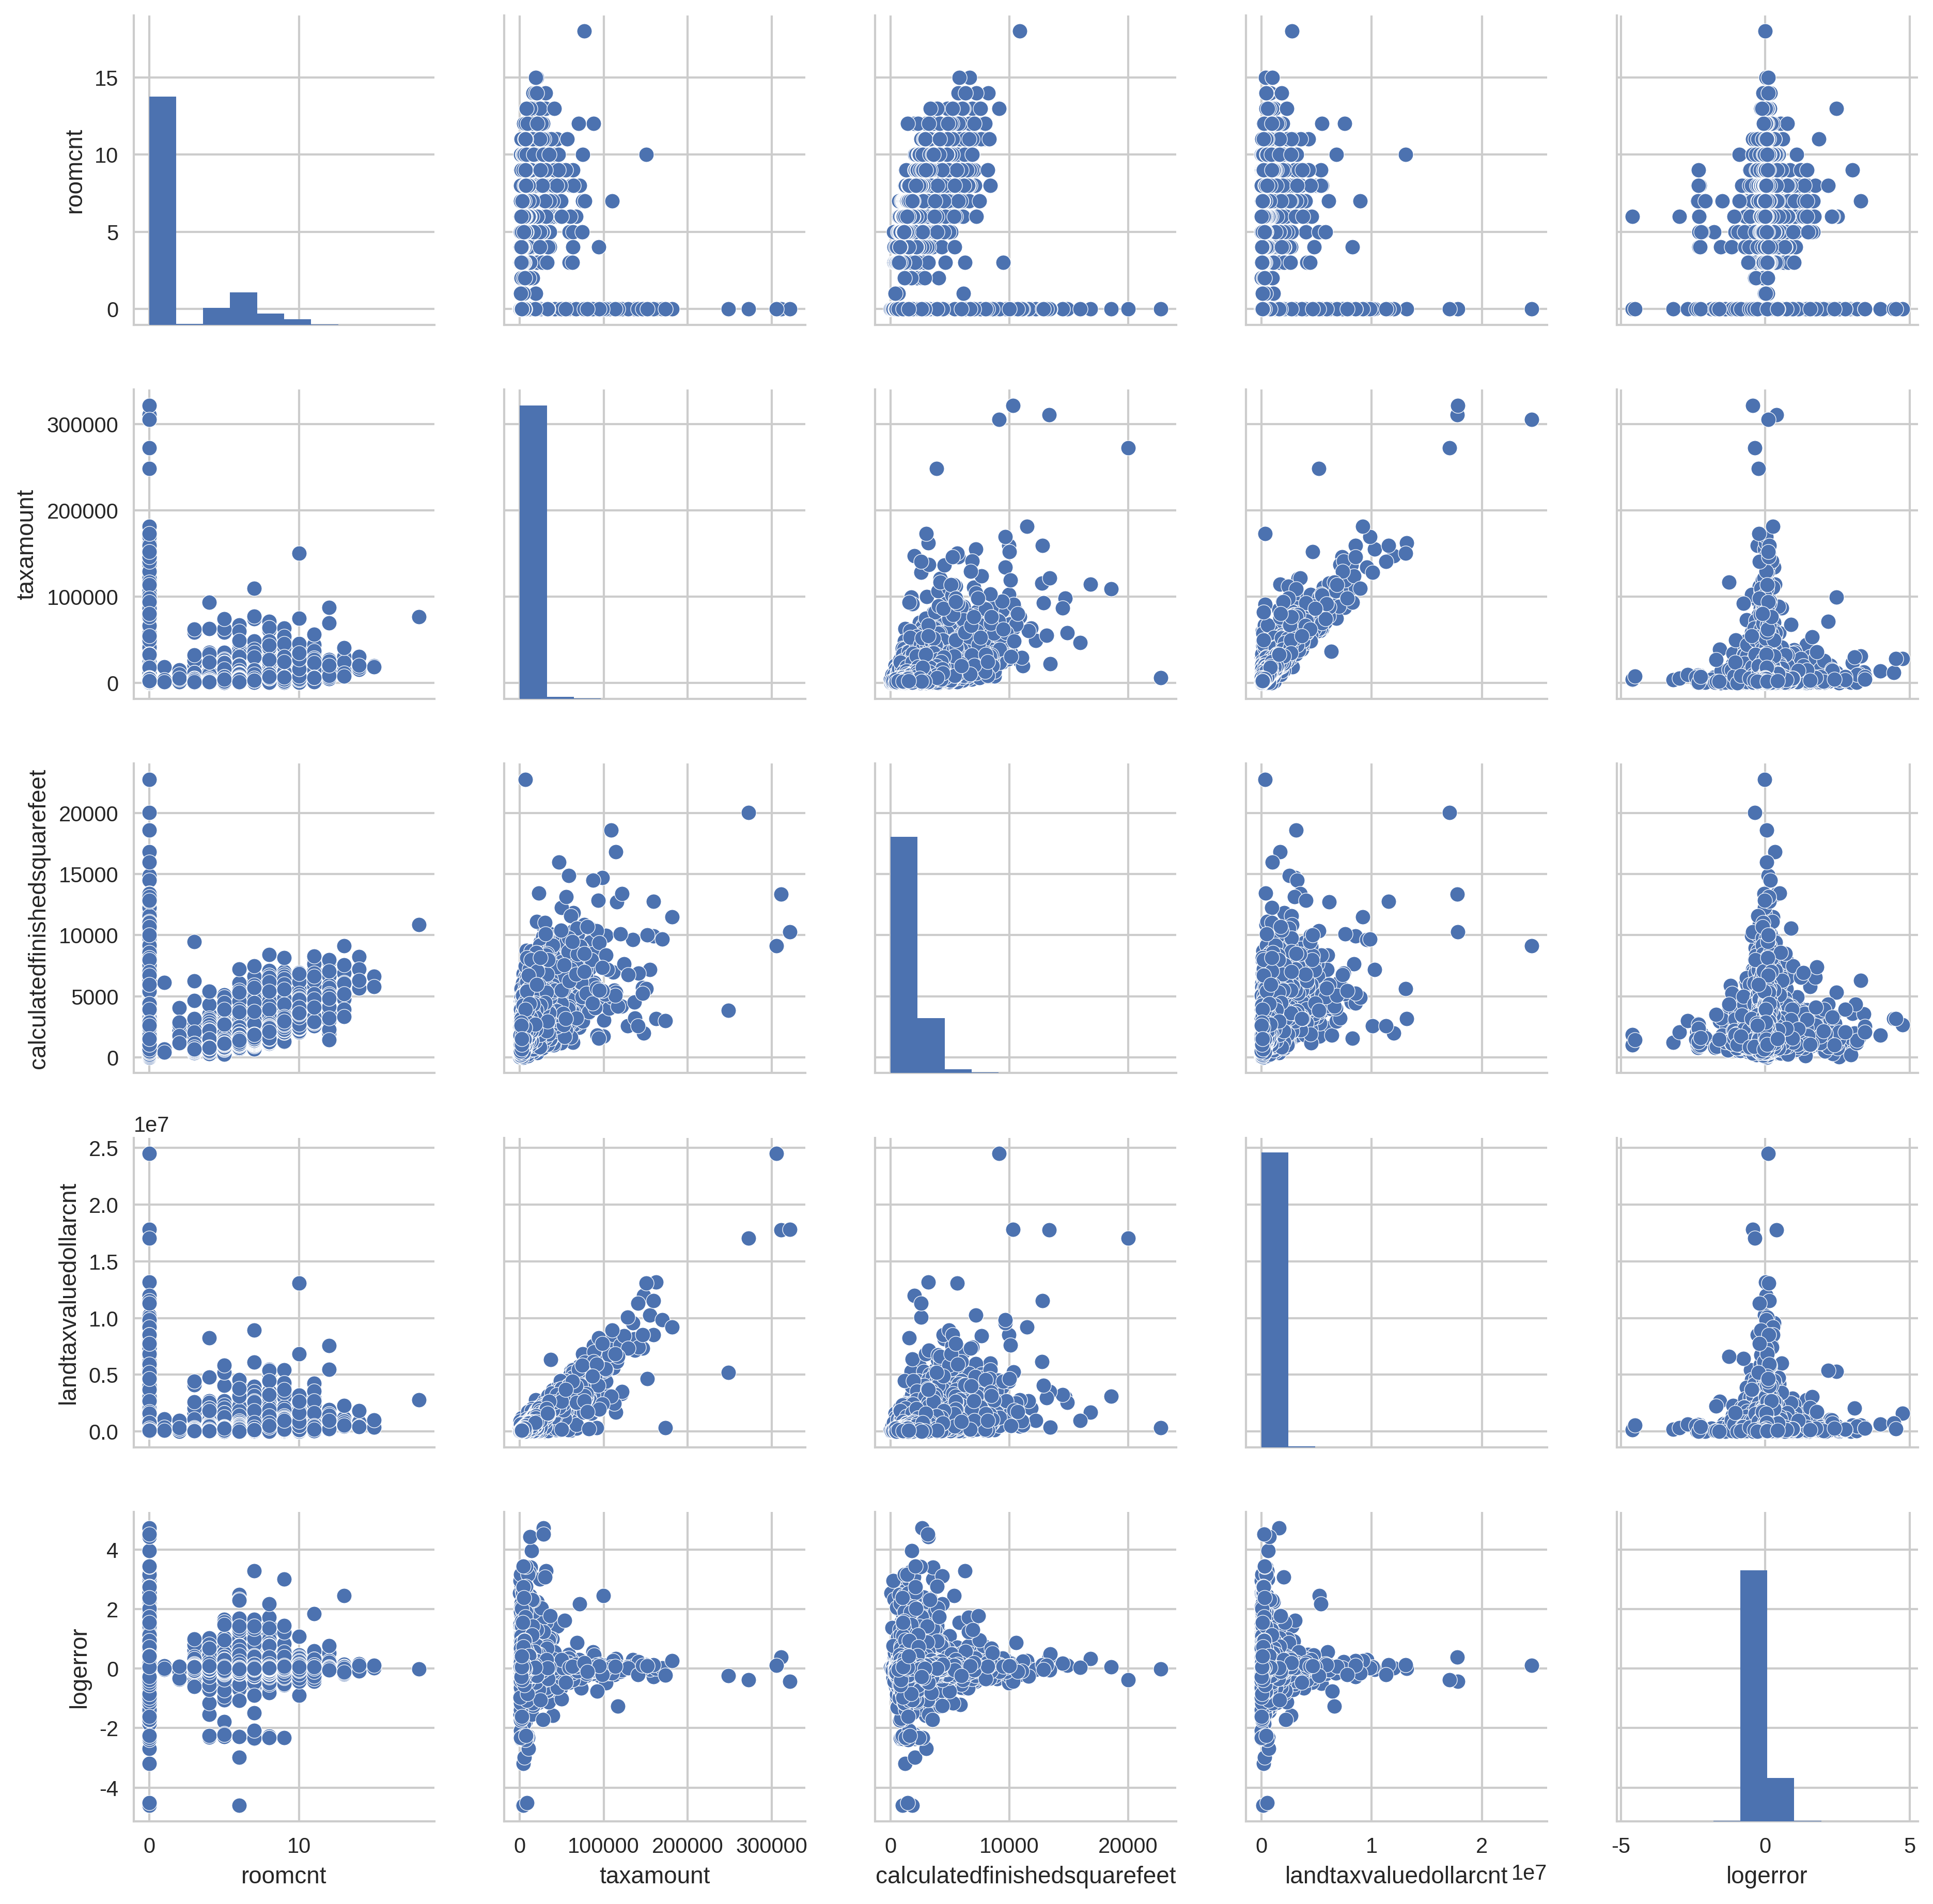

In [27]:
# logerror와 독립변수들 pairplot
sns.set(style="whitegrid", context="notebook")
cols = ["roomcnt", "taxamount", "calculatedfinishedsquarefeet", "landtaxvaluedollarcnt", "logerror"]
sns.pairplot(df_train3[cols], size=2.5)

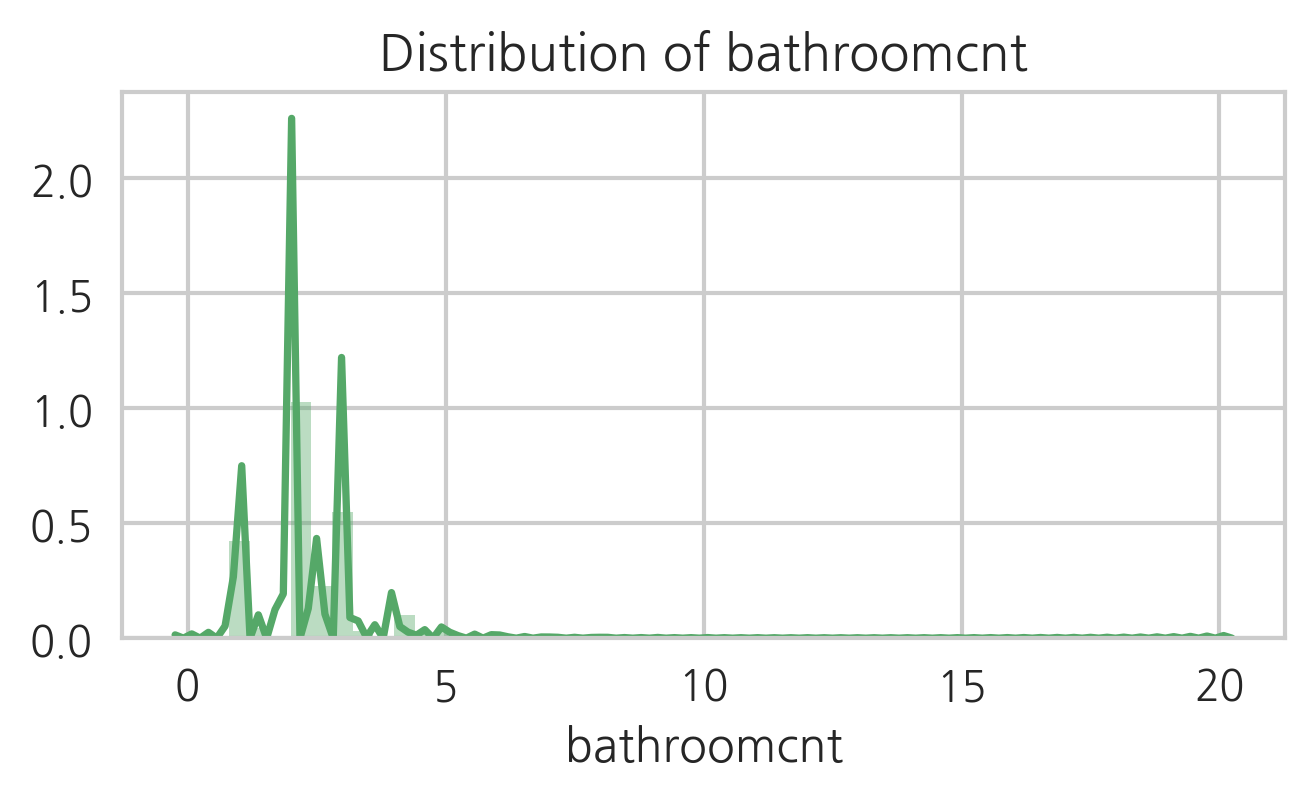

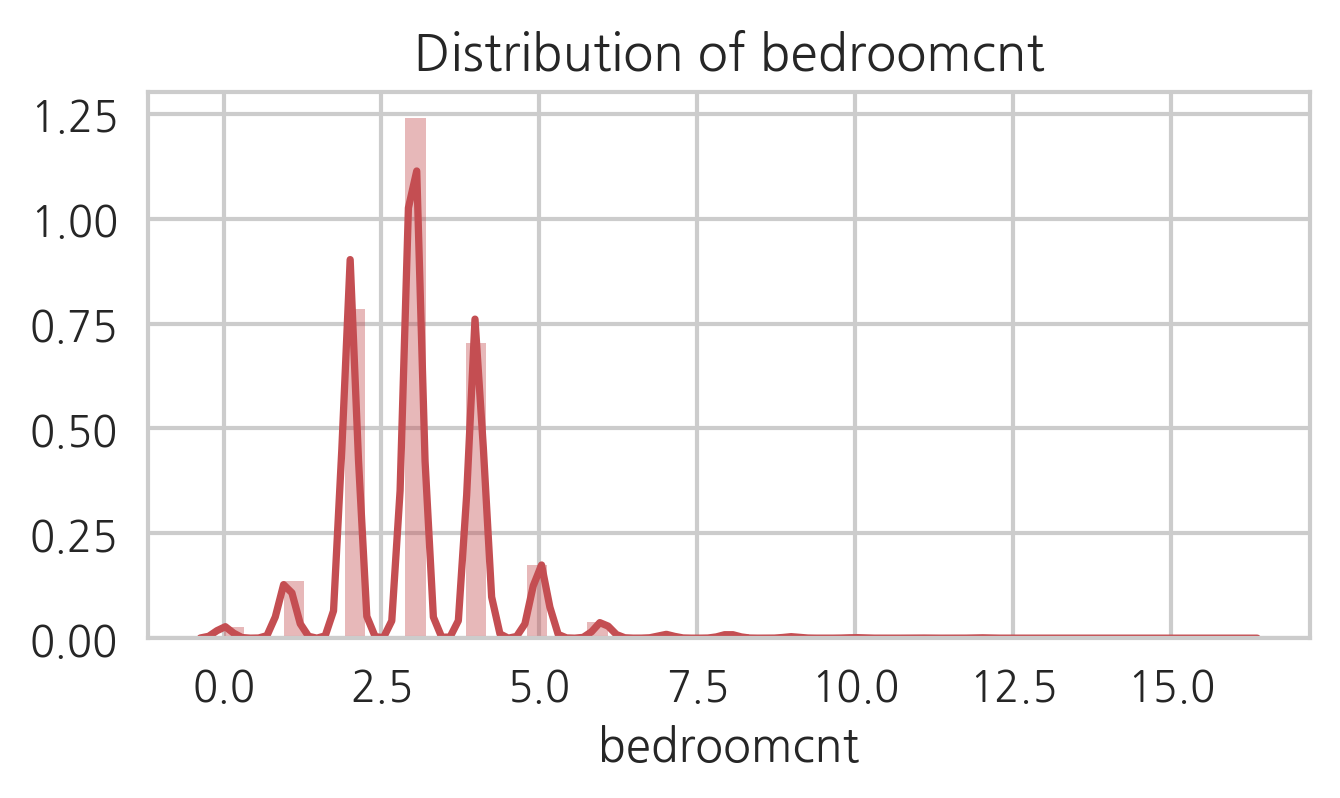

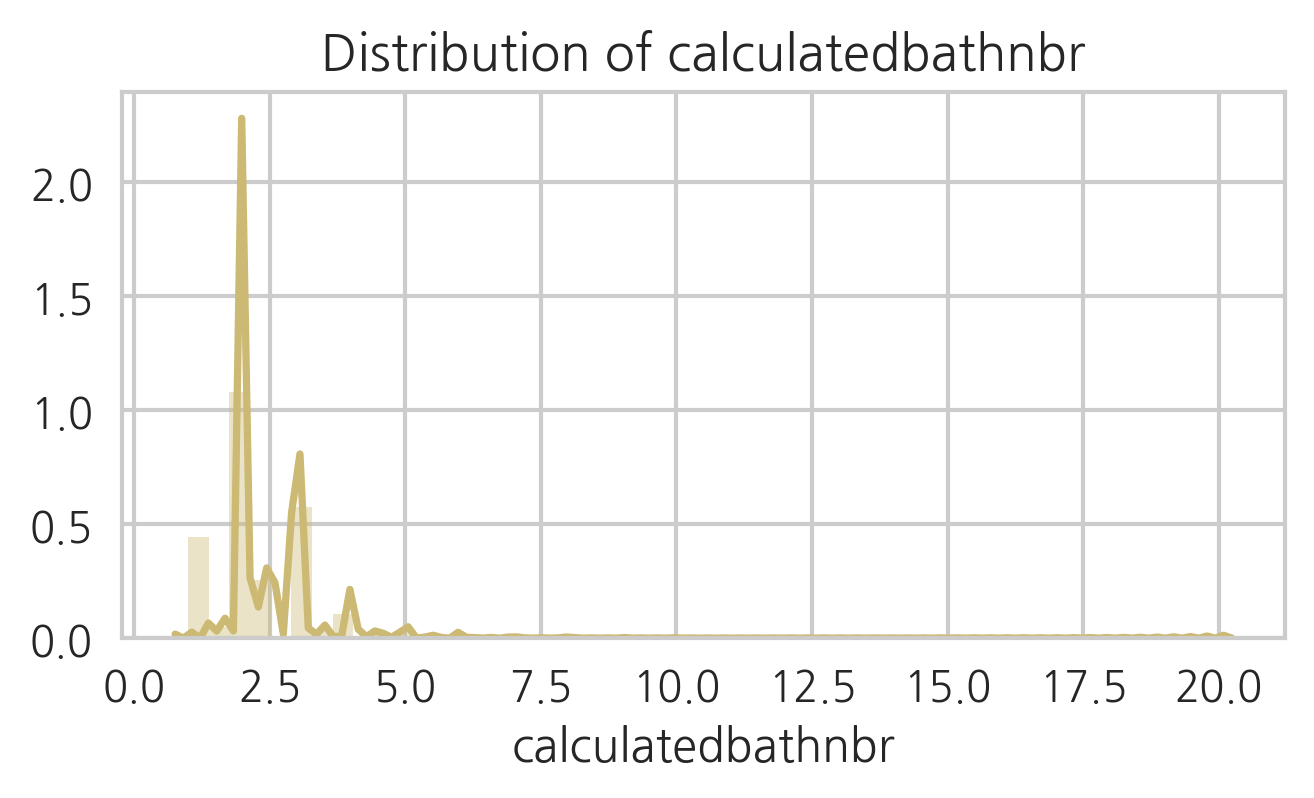

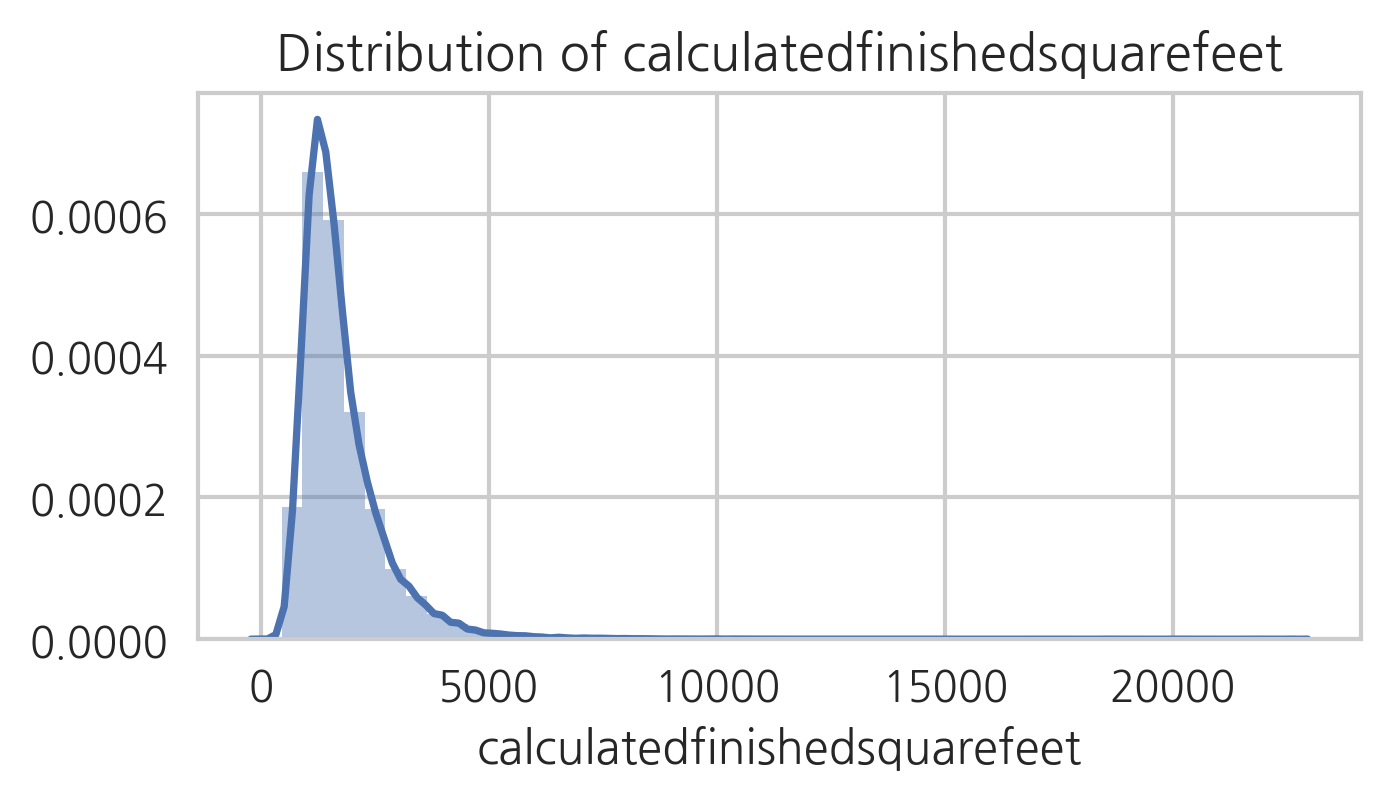

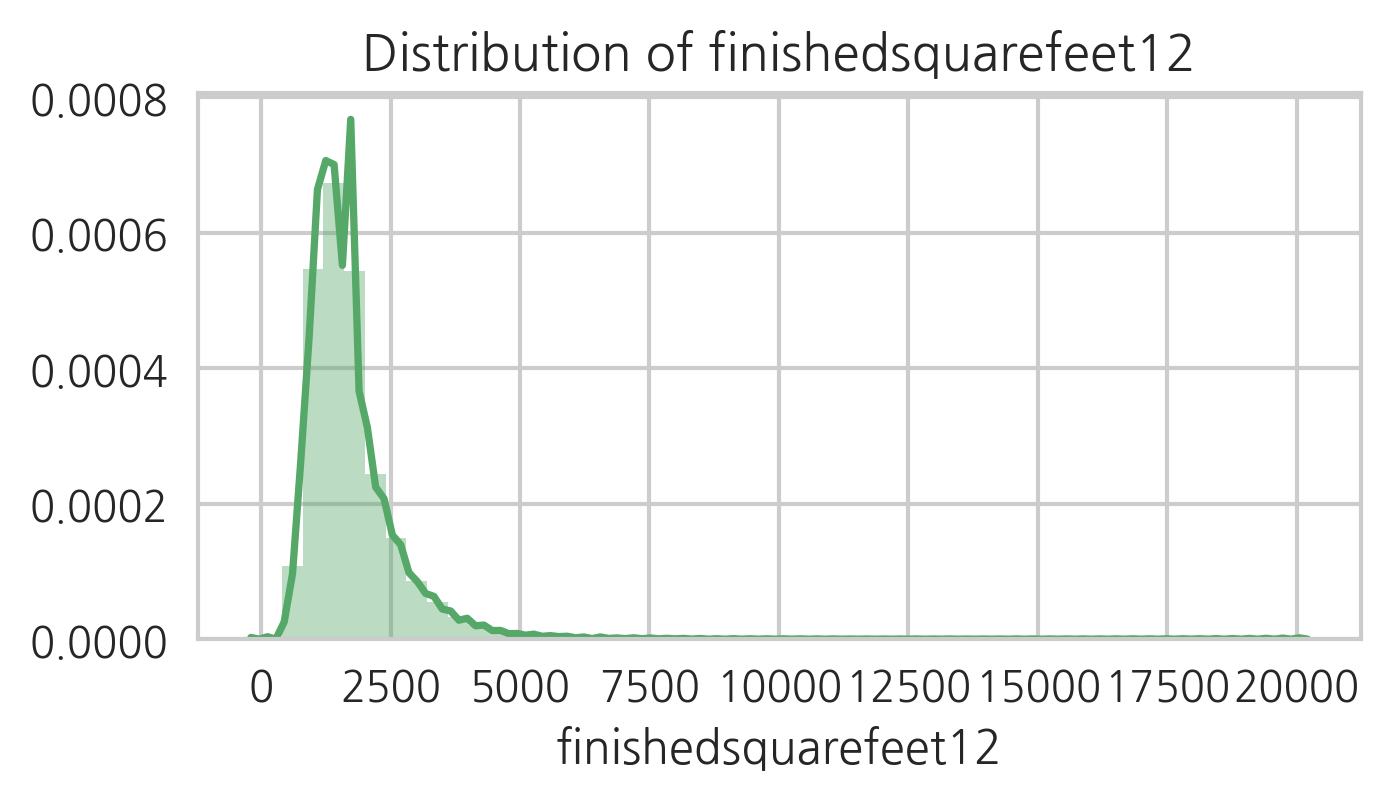

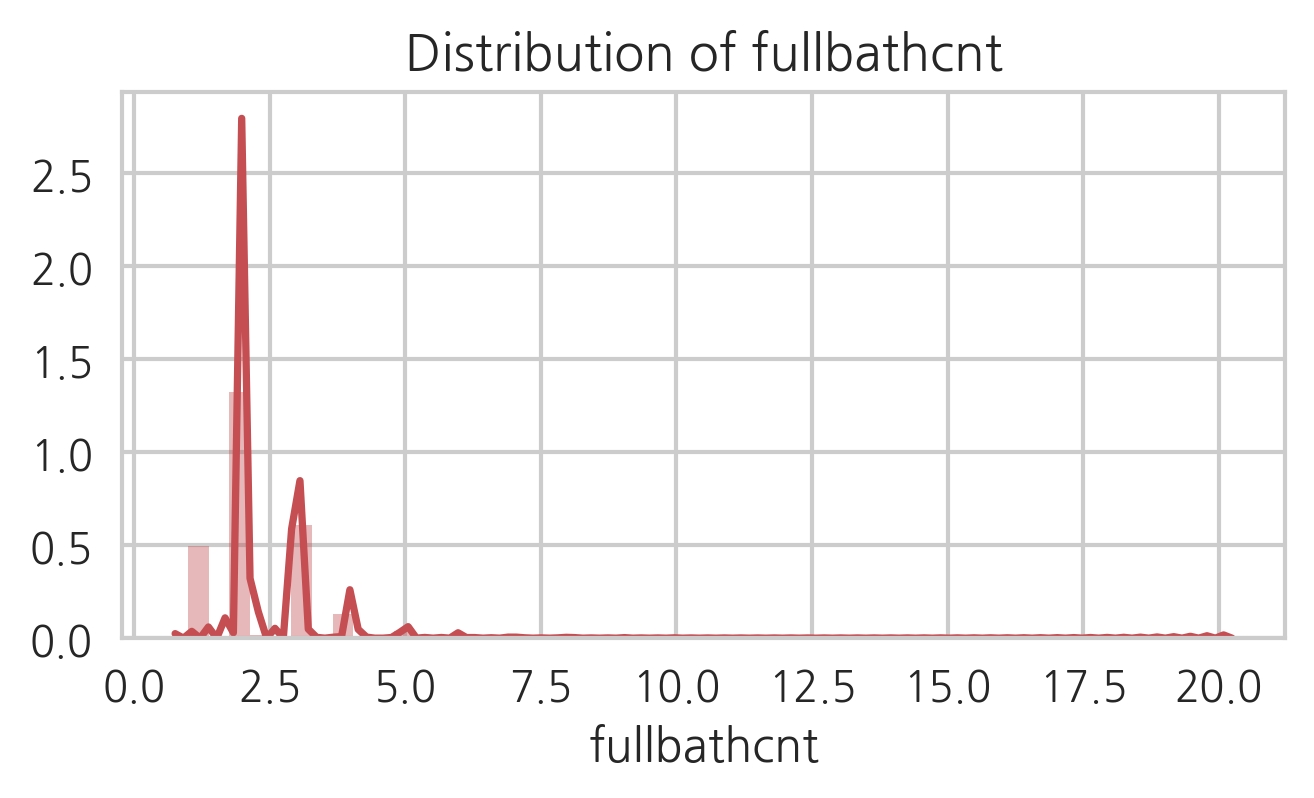

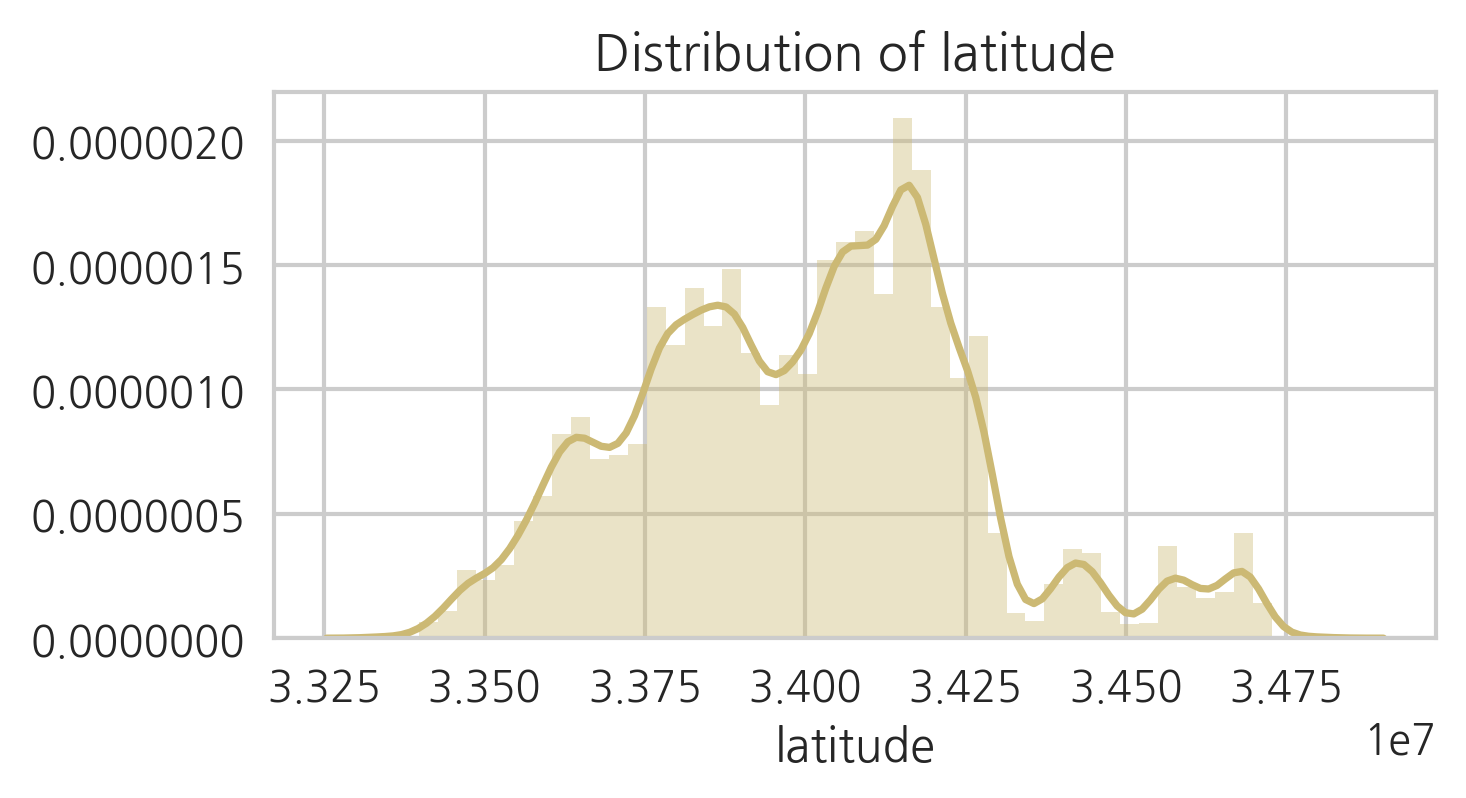

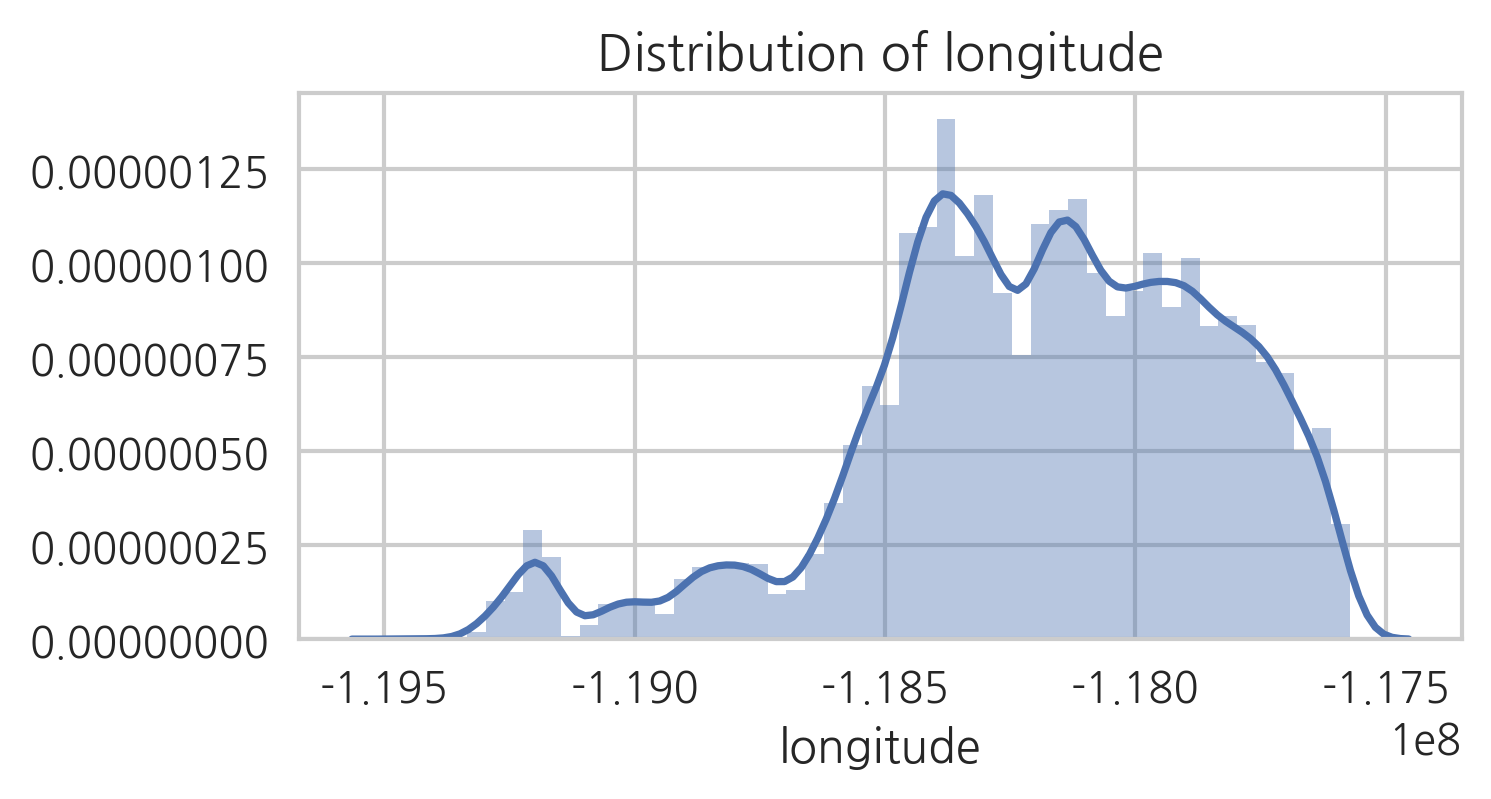

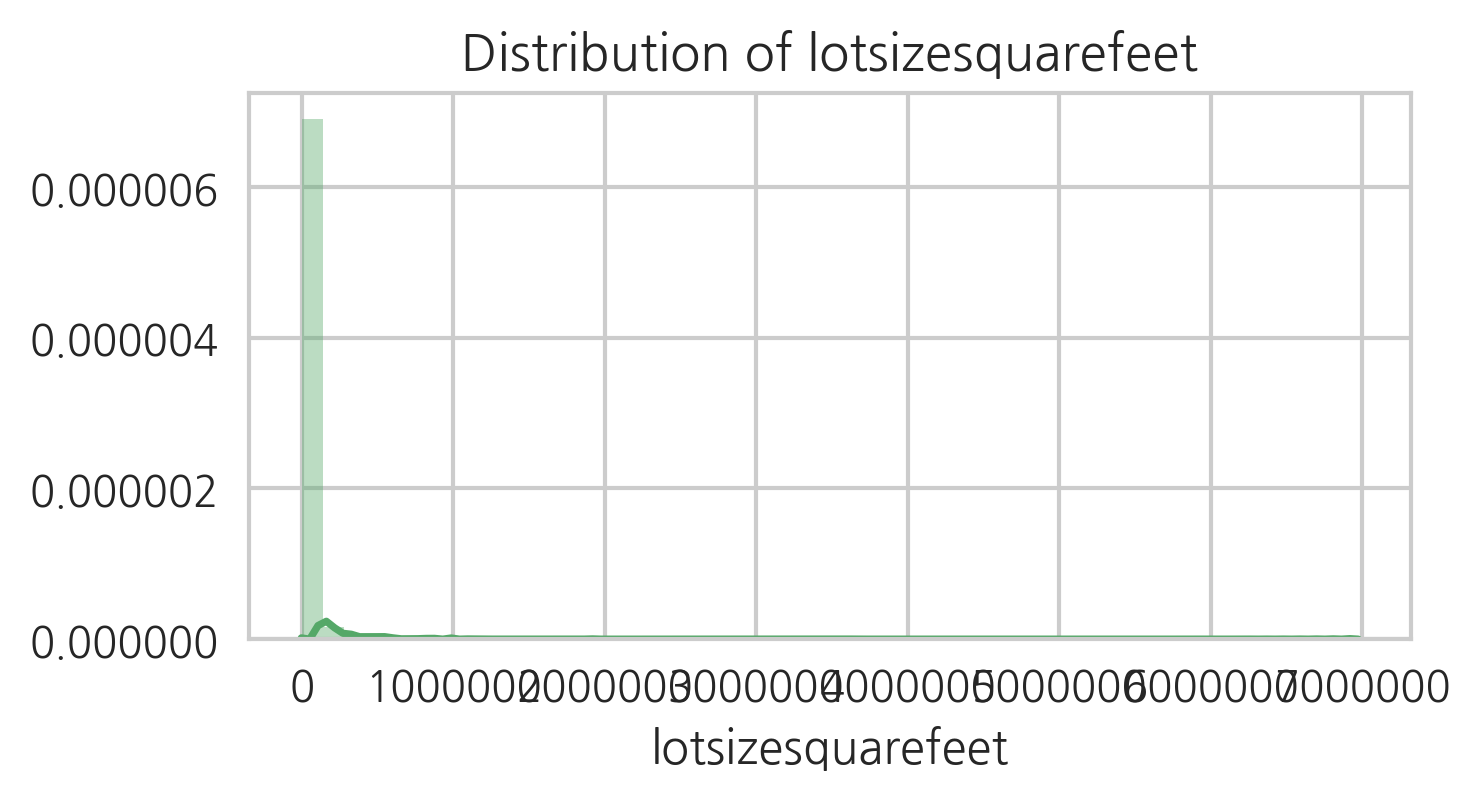

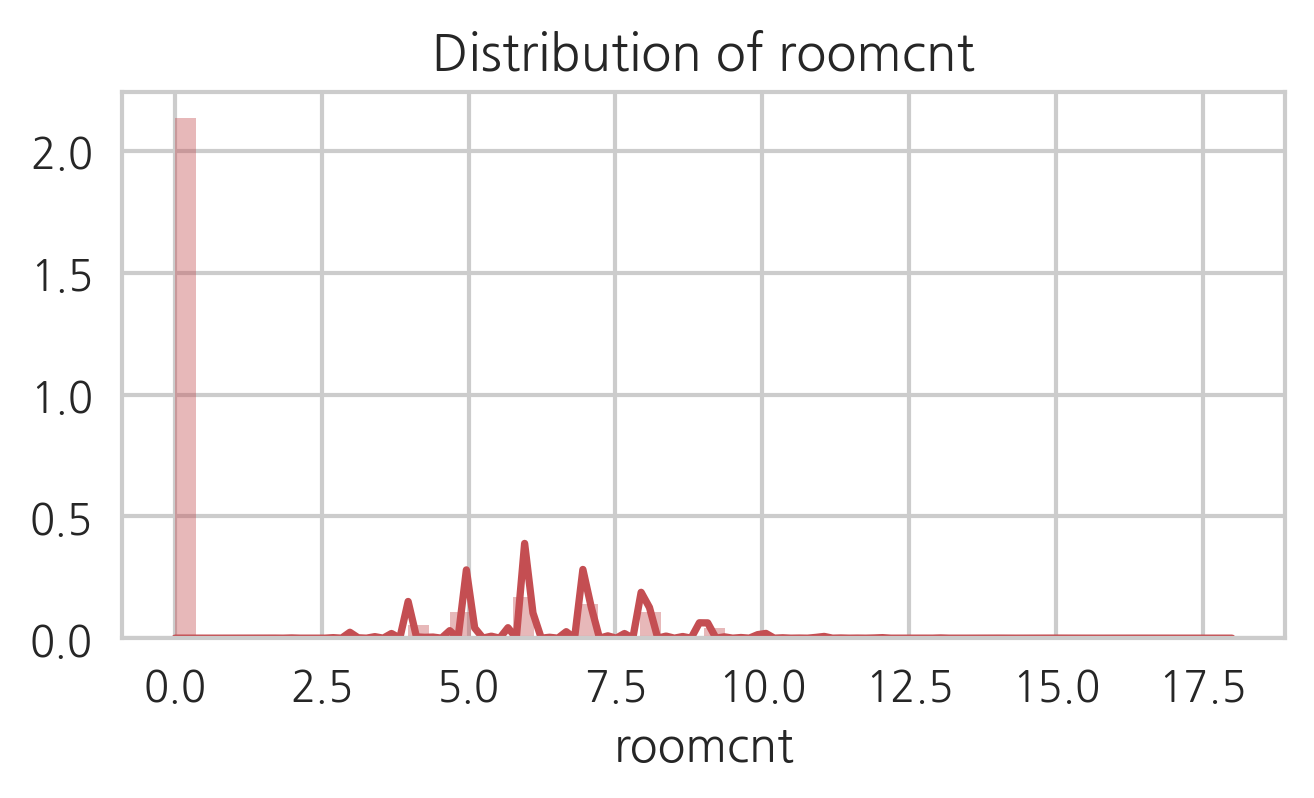

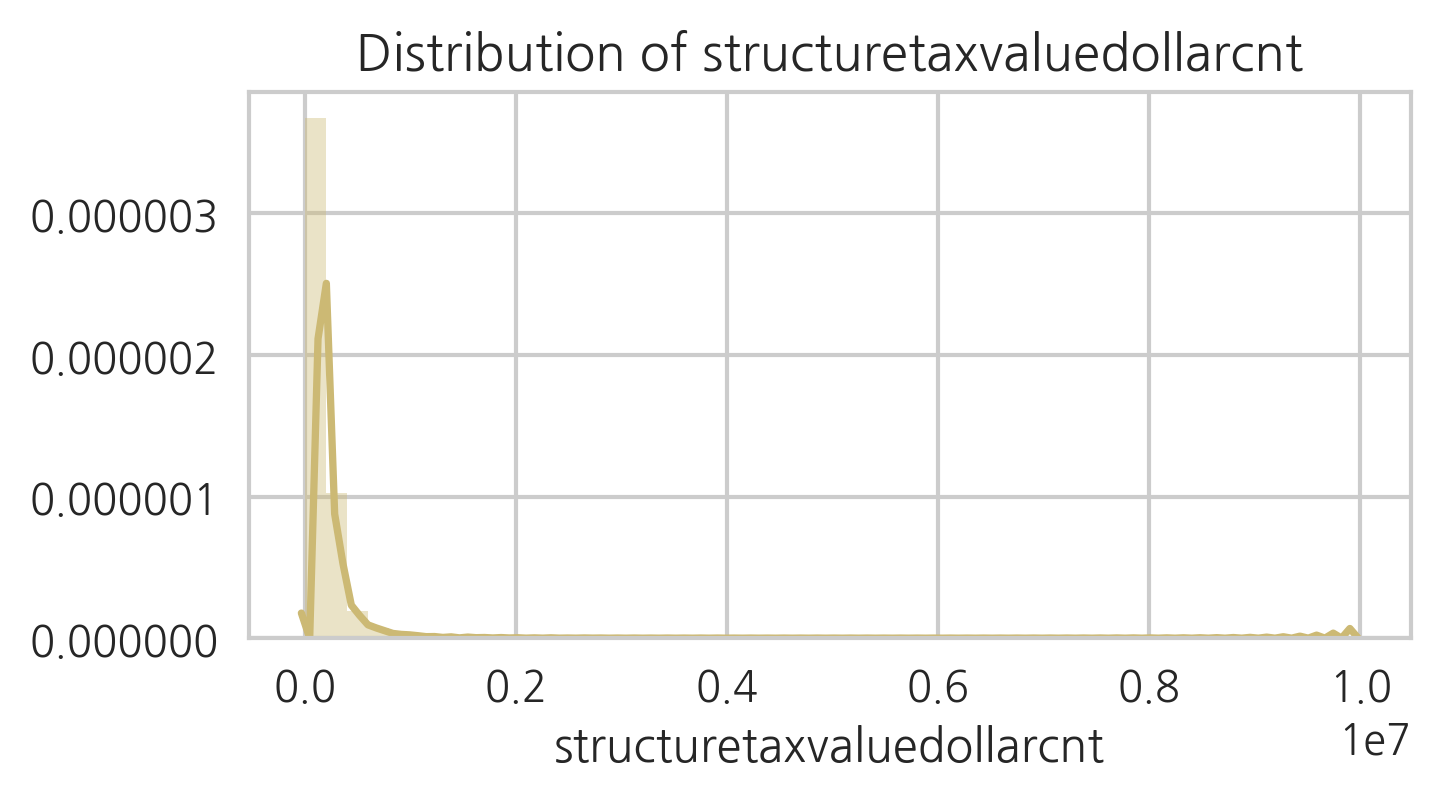

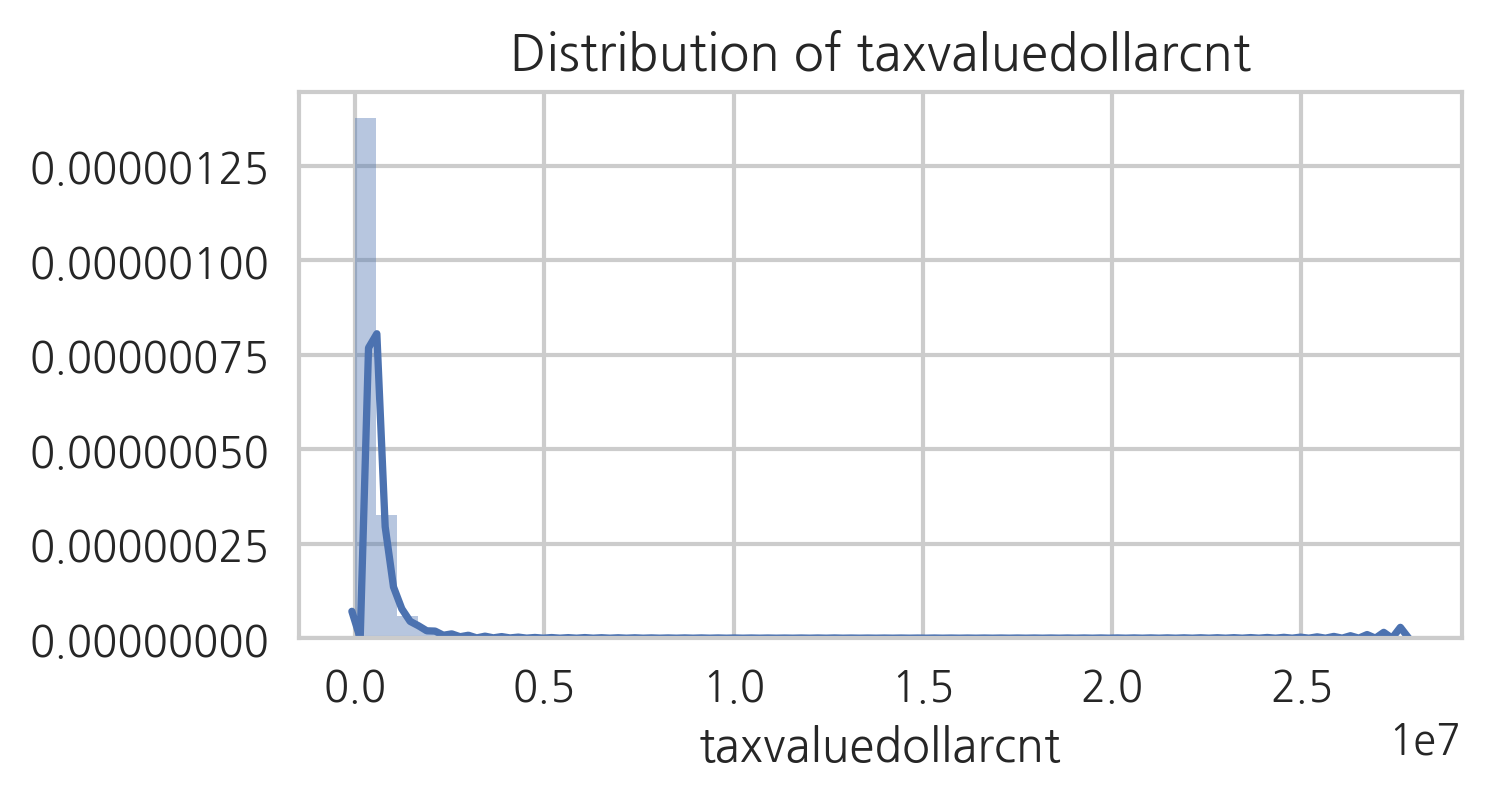

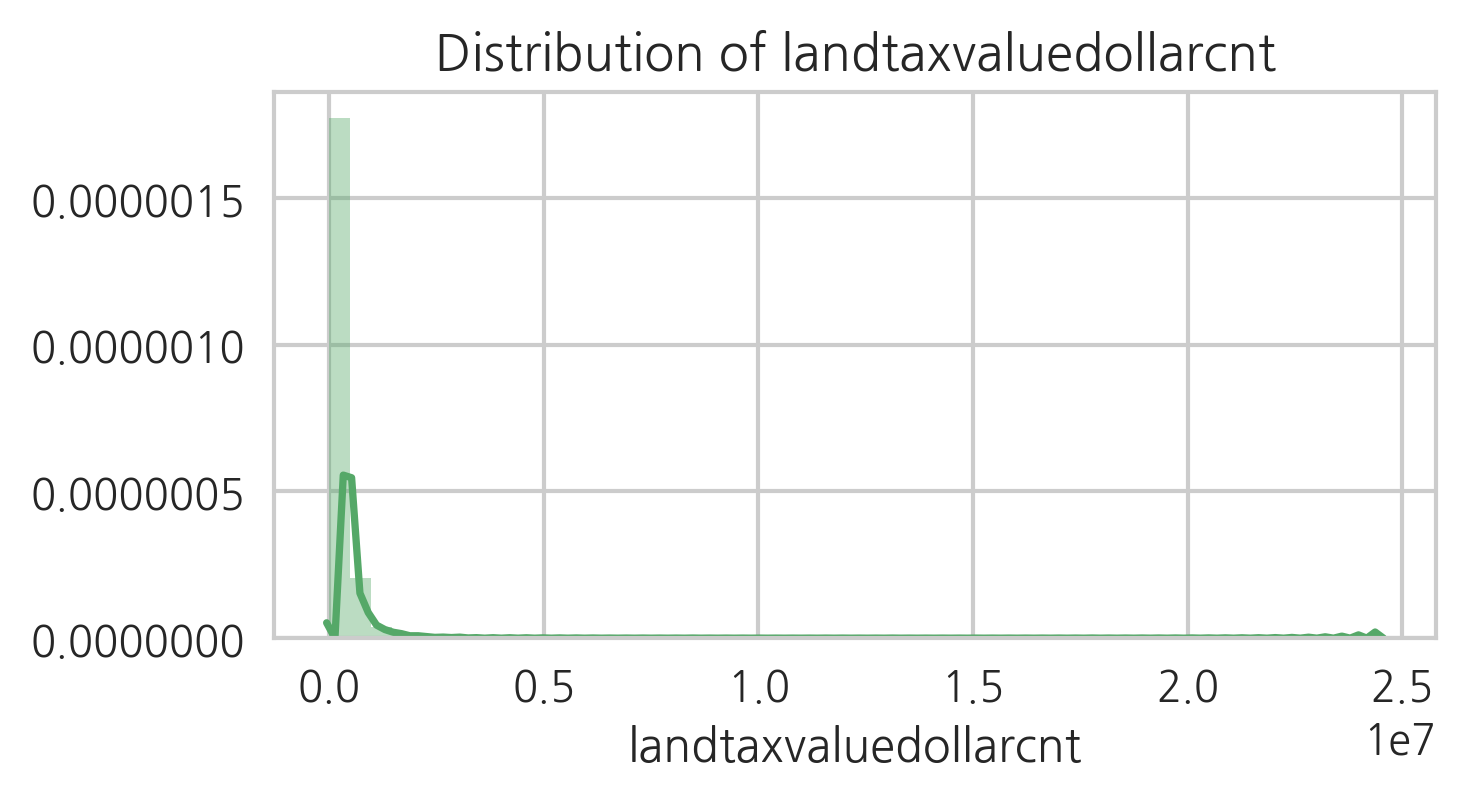

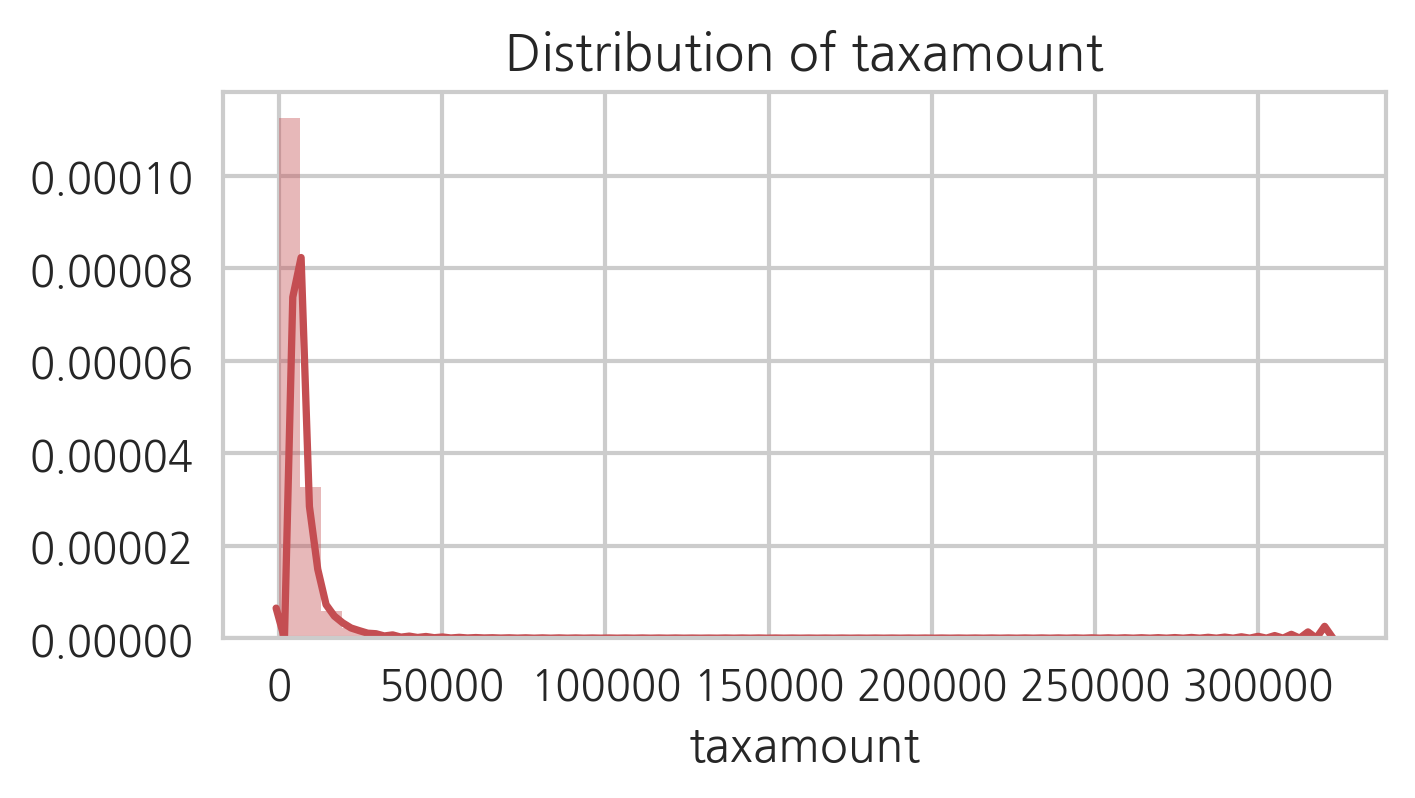

In [ ]:
num = 1
num2 = len(numeric)
c = "bgry"
for x in numeric:
    n = num % 4
    plt.figure(figsize=(5, 40))
    f = plt.subplot(num2, 1, num)
    sns.distplot(df_train3[x], color=c[n])
    plt.title("Distribution of " + x)
    num += 1

/home/dockeruser/anaconda2/lib/python2.7/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


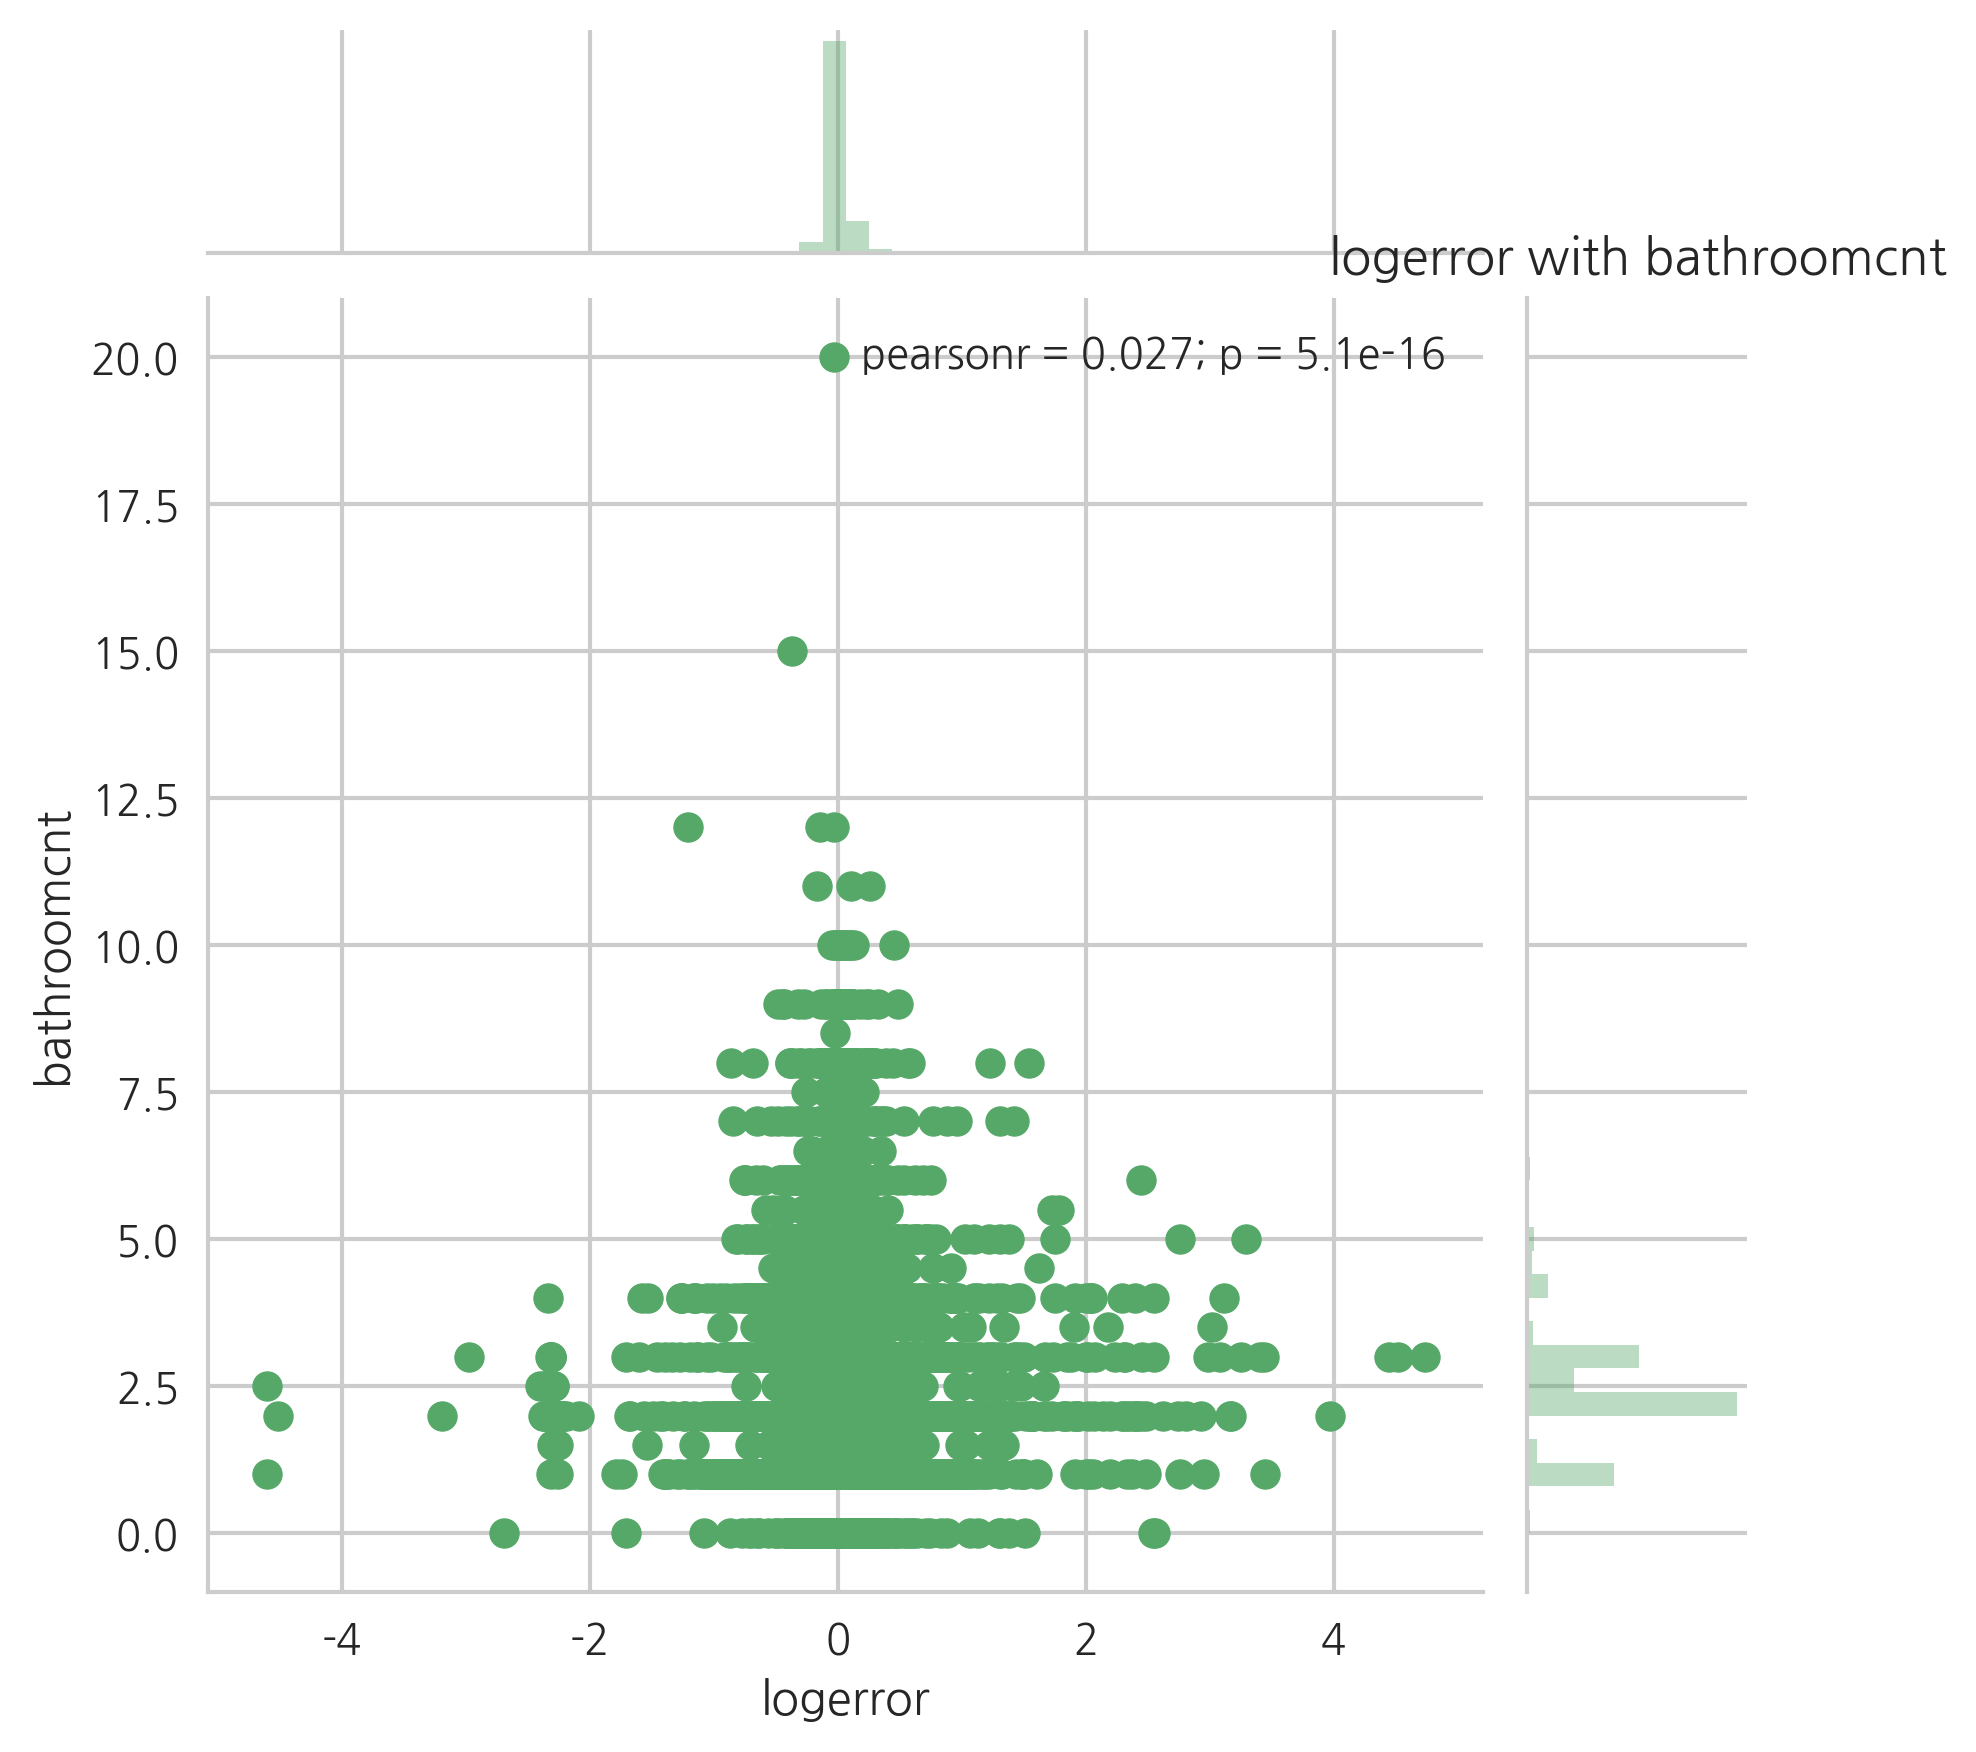

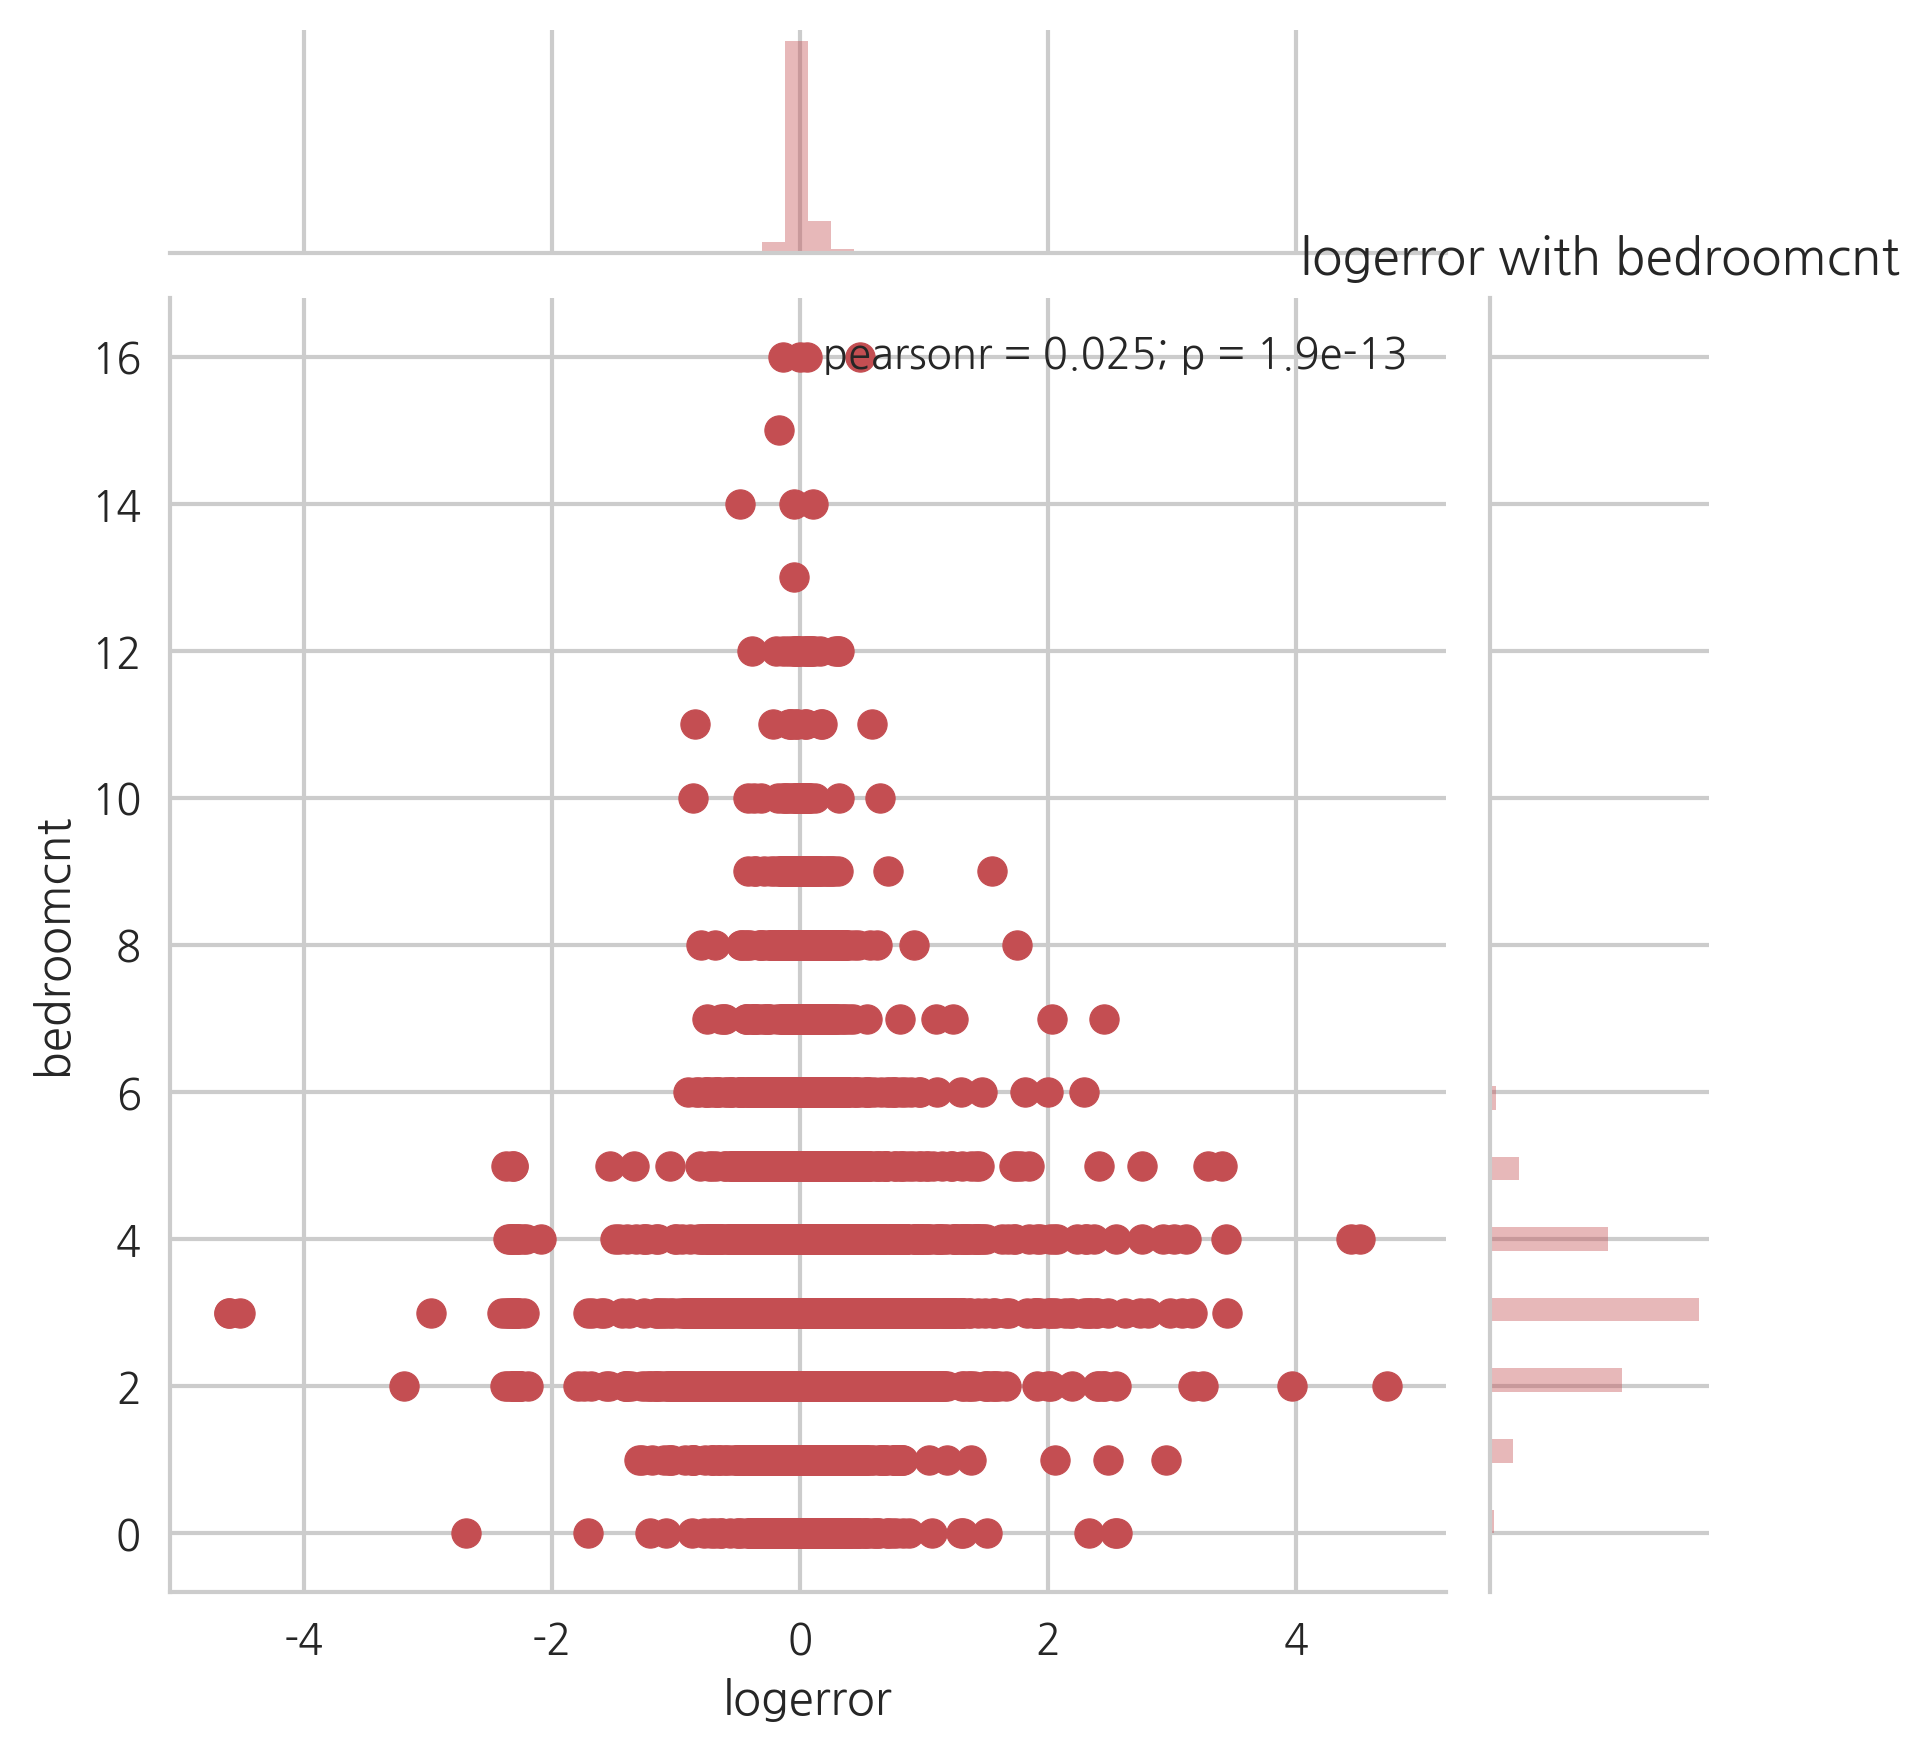

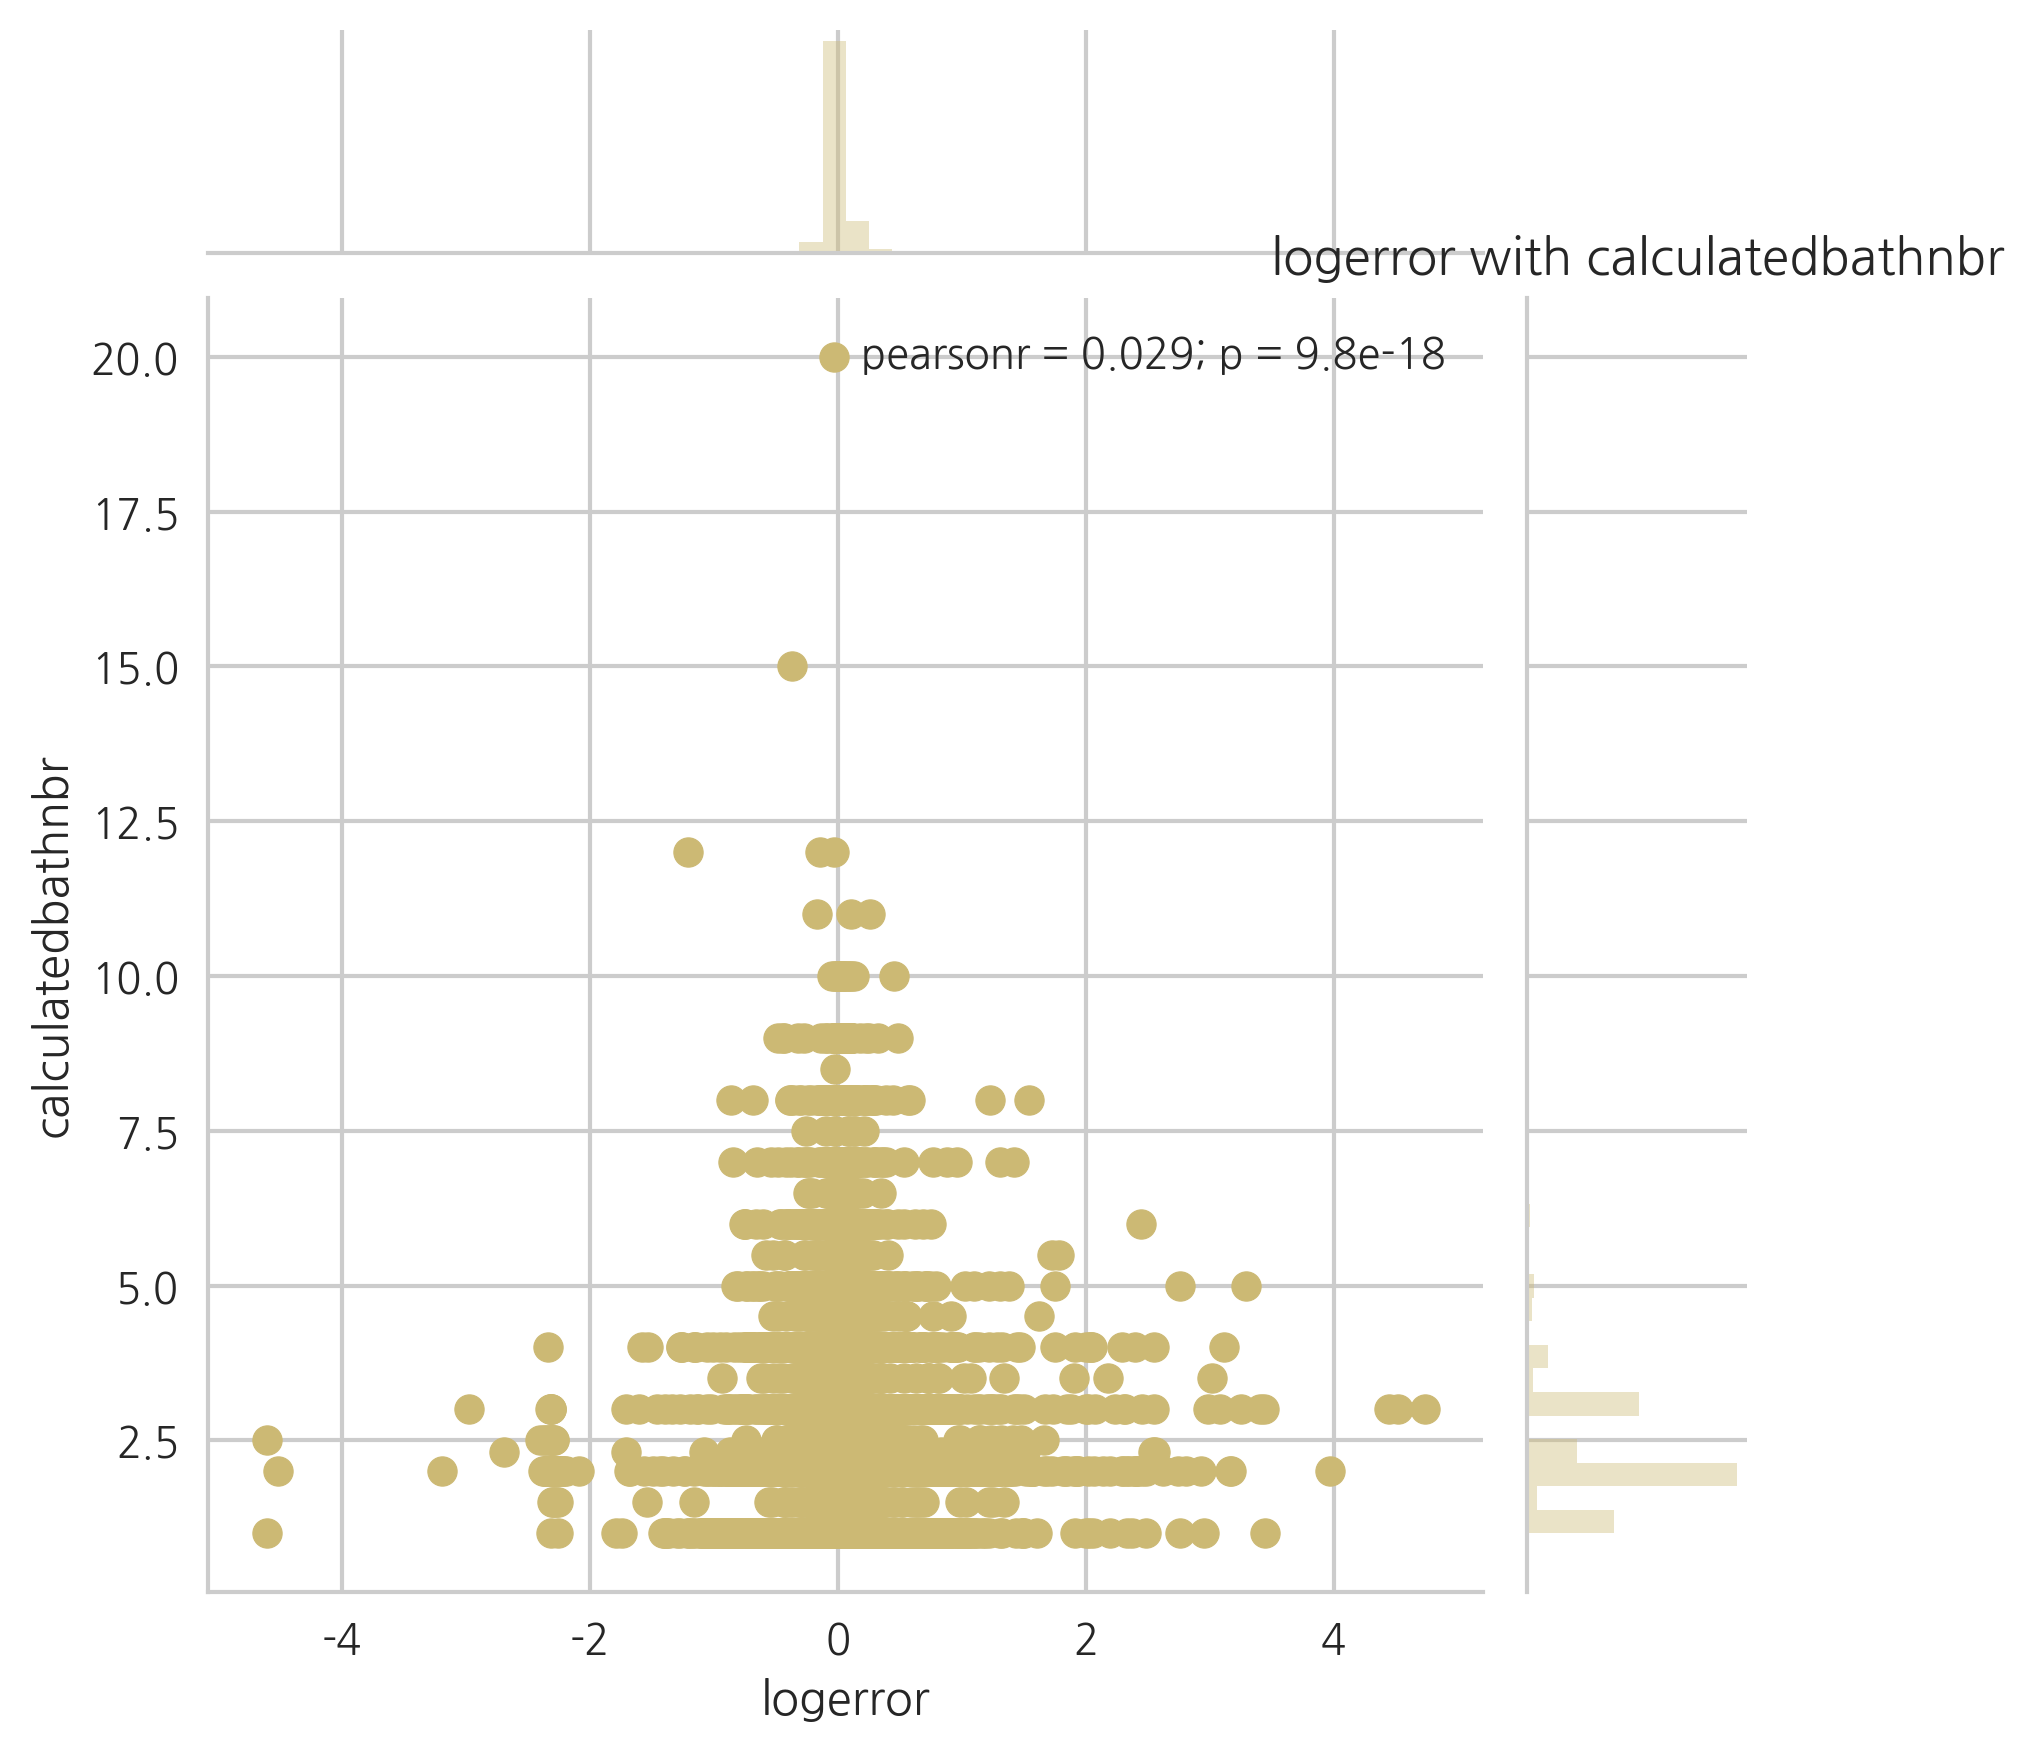

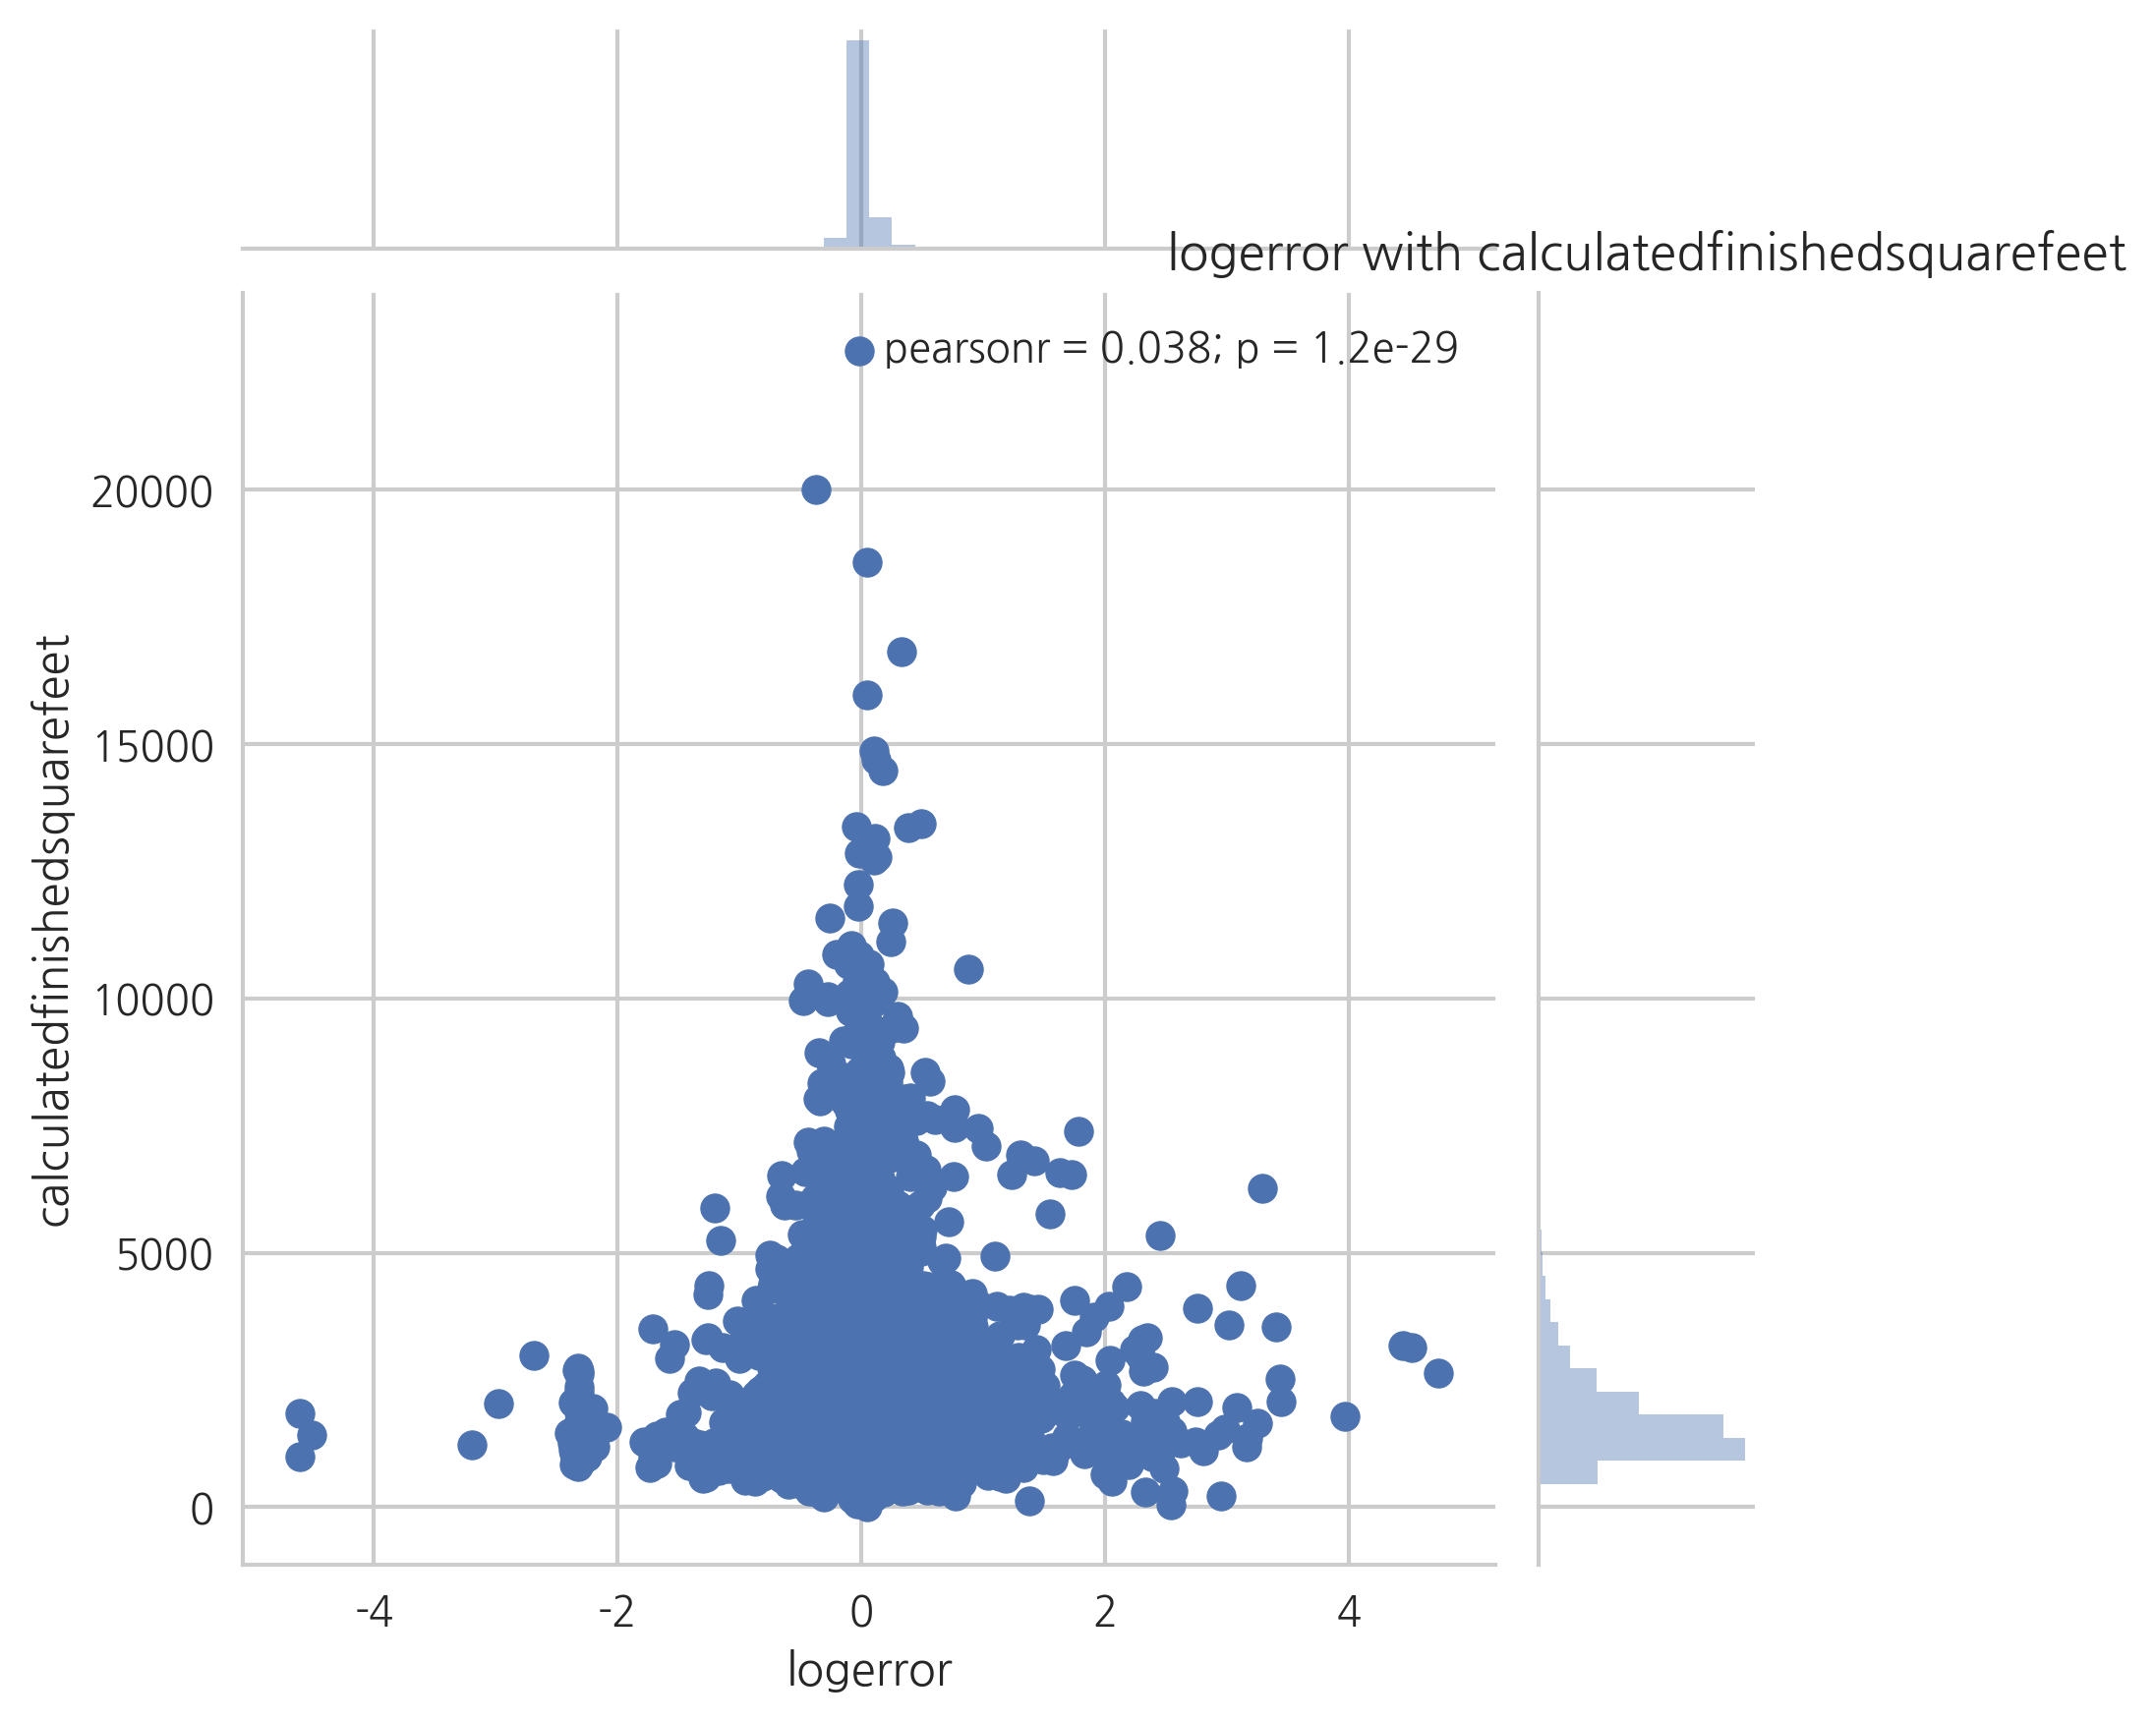

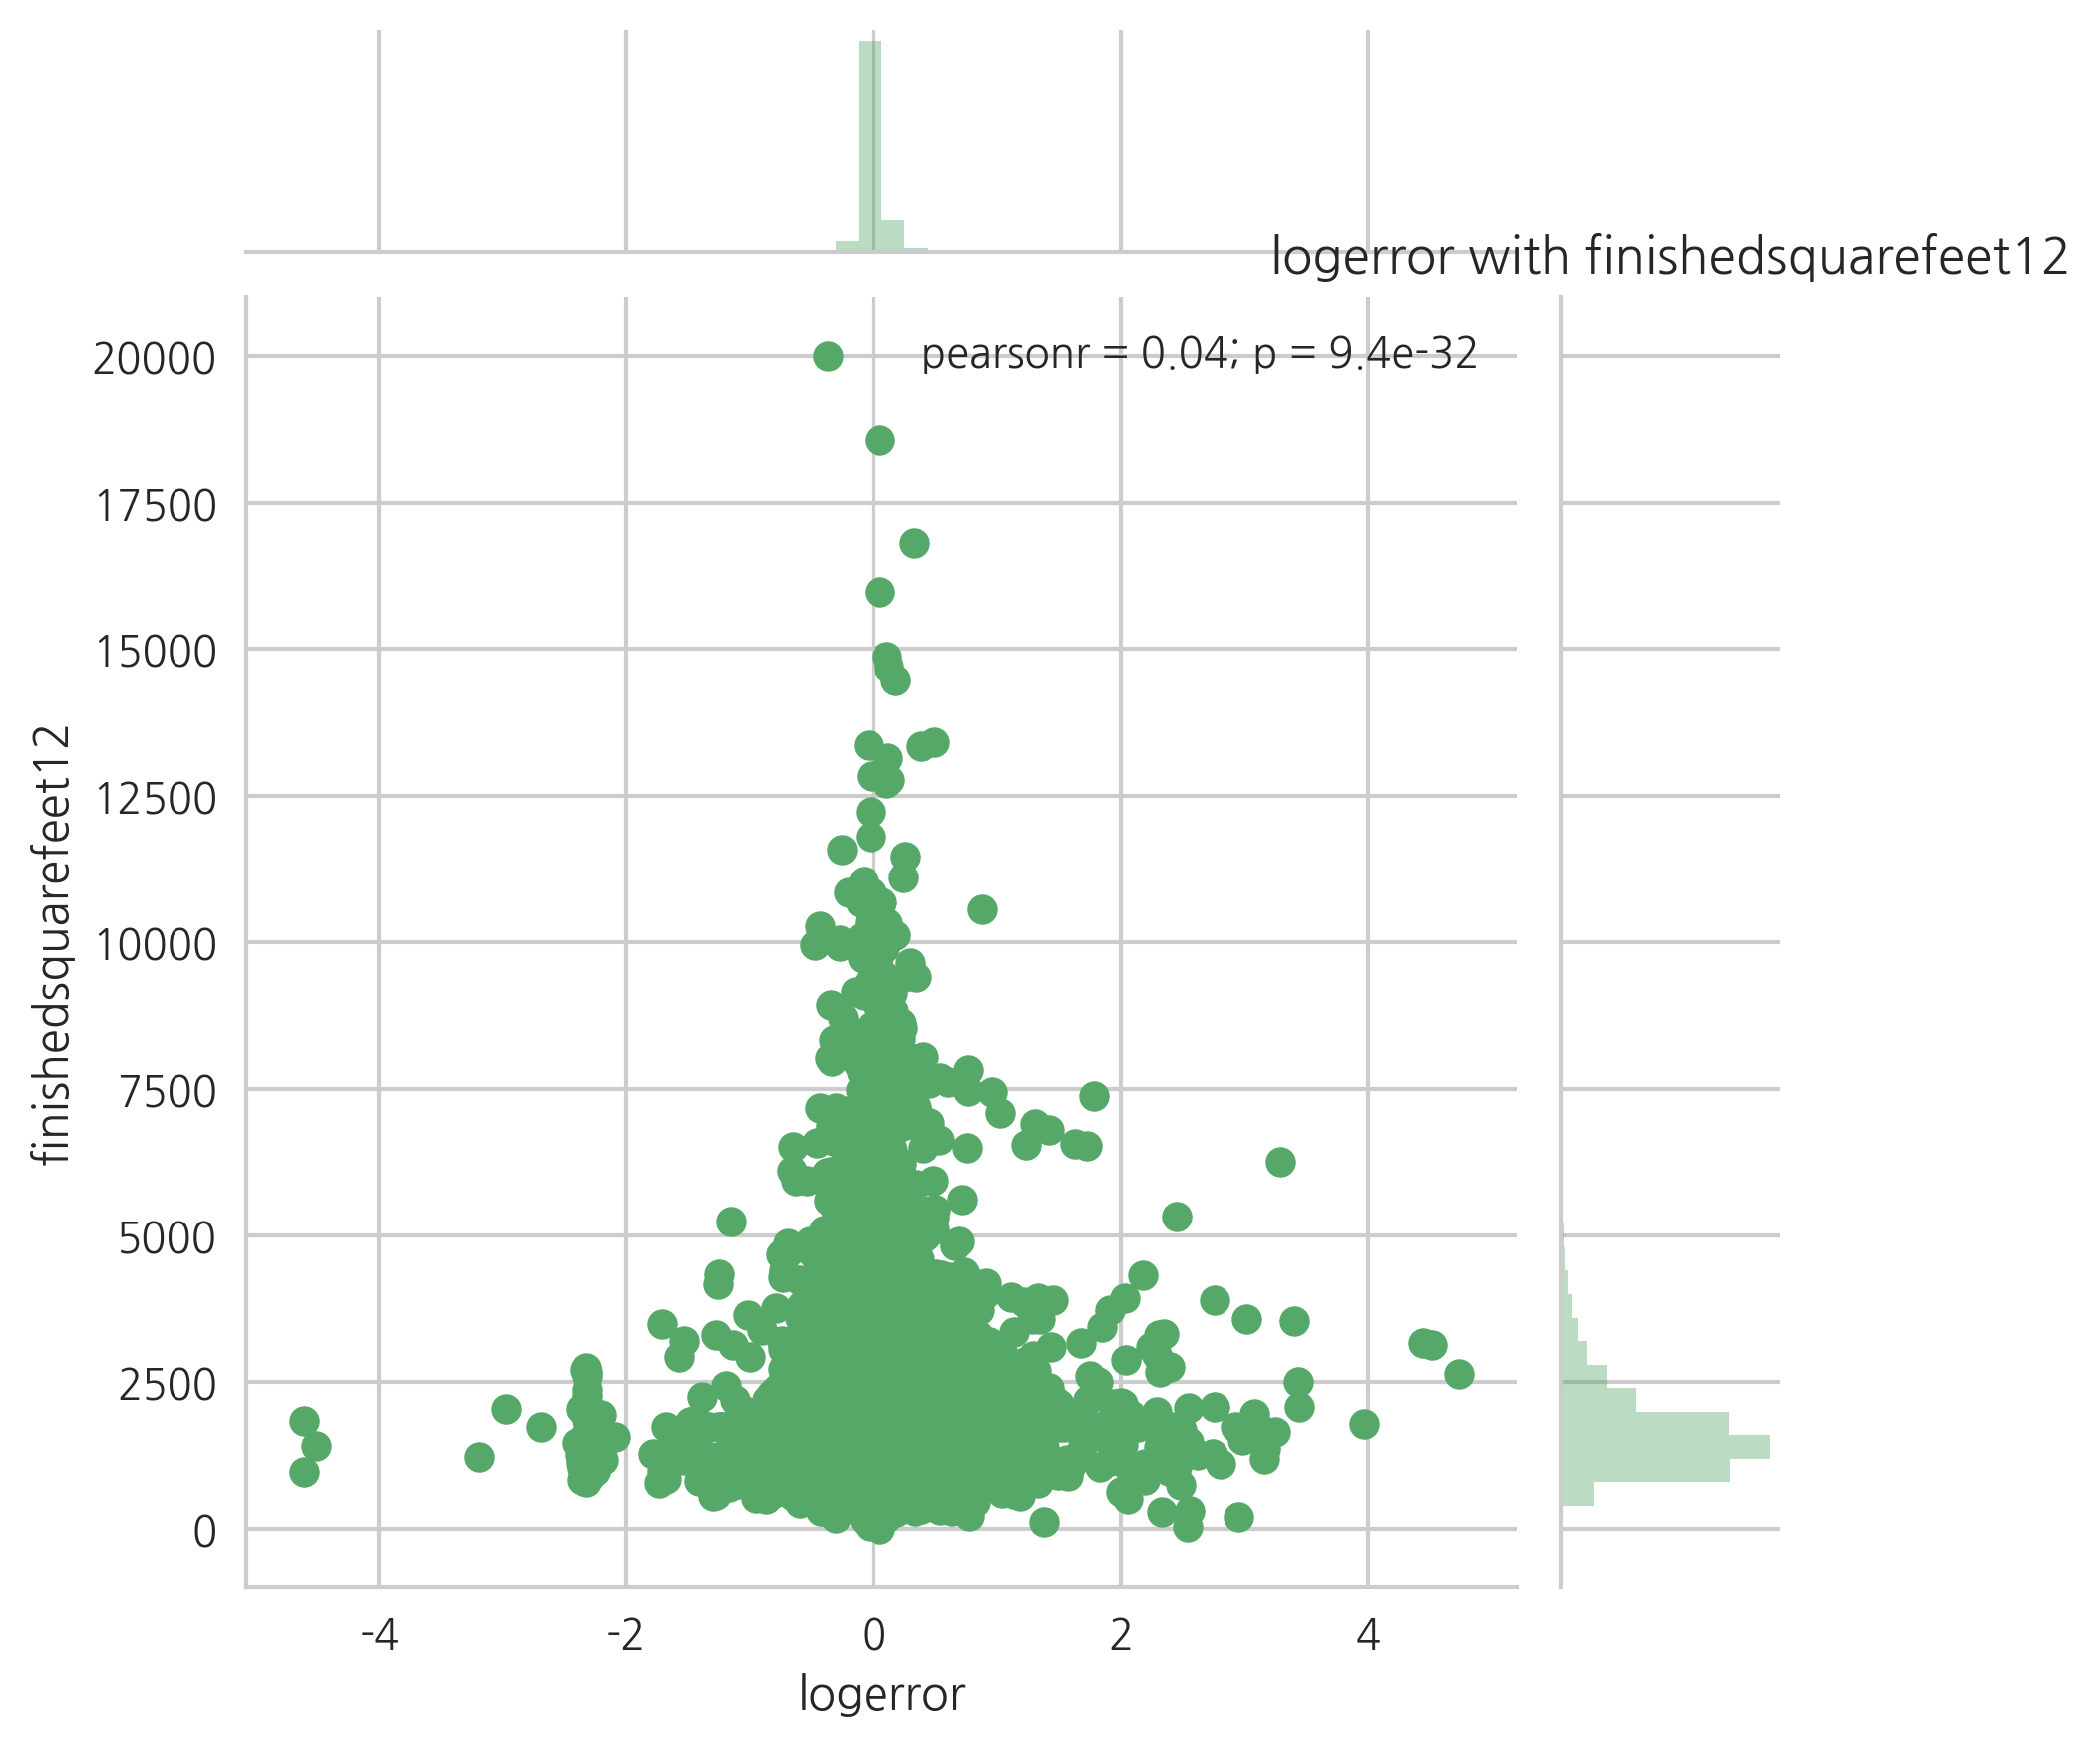

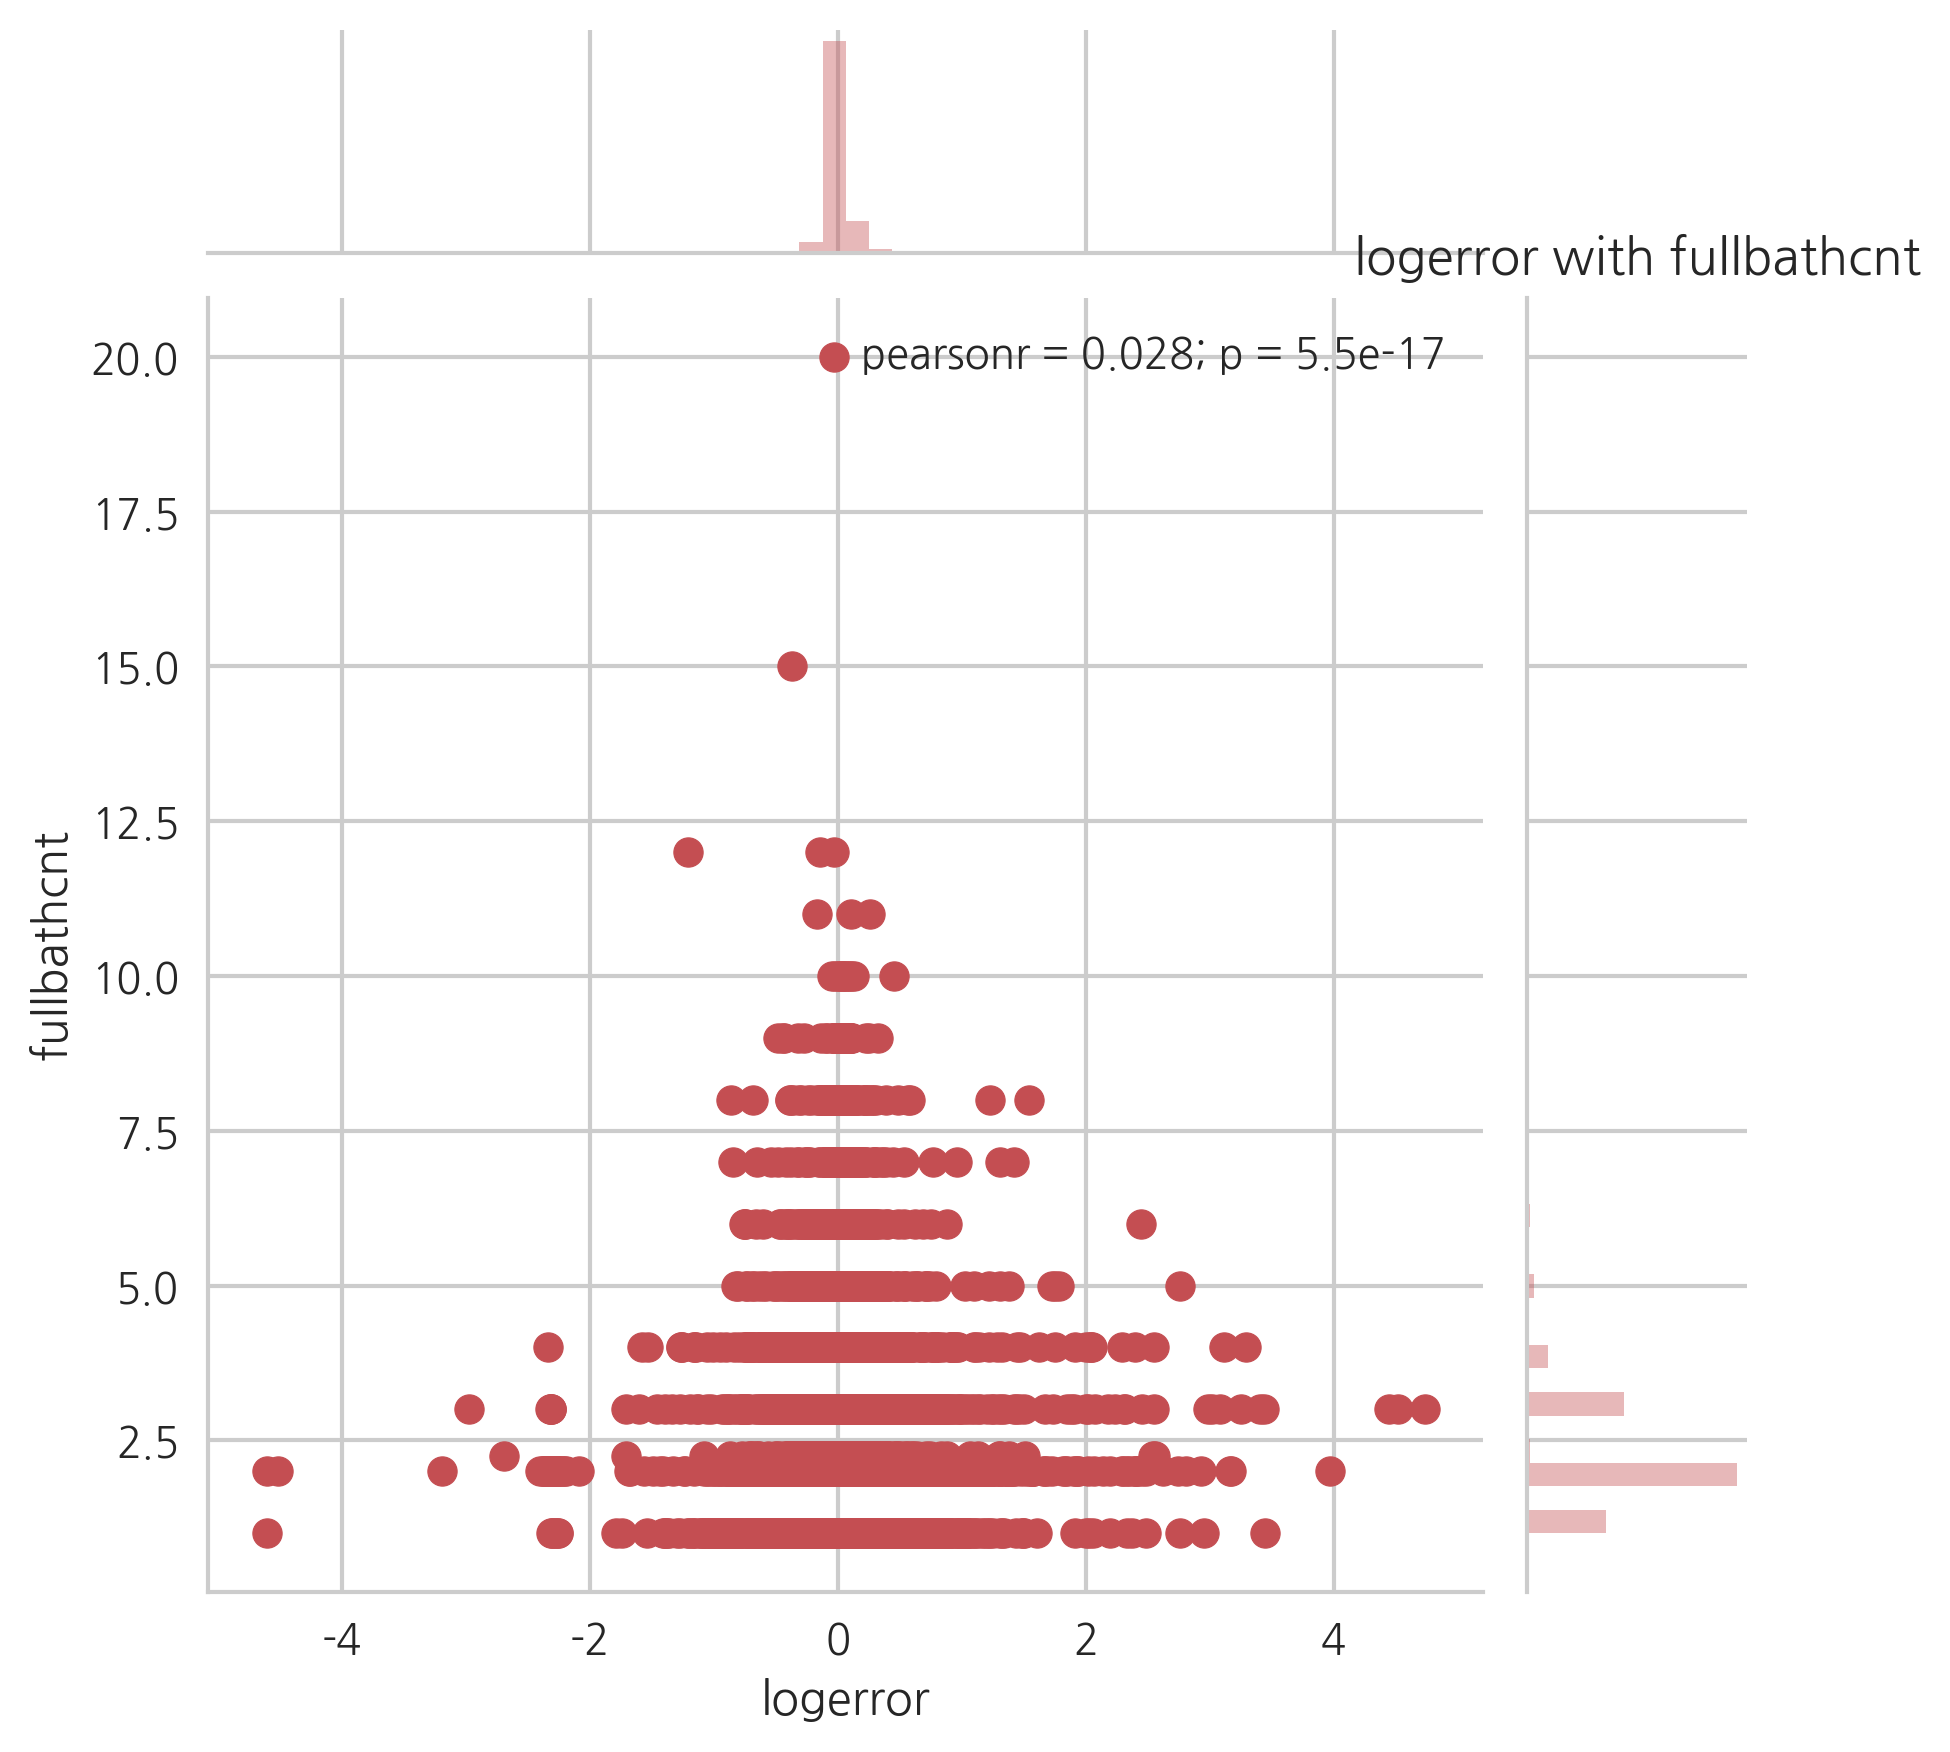

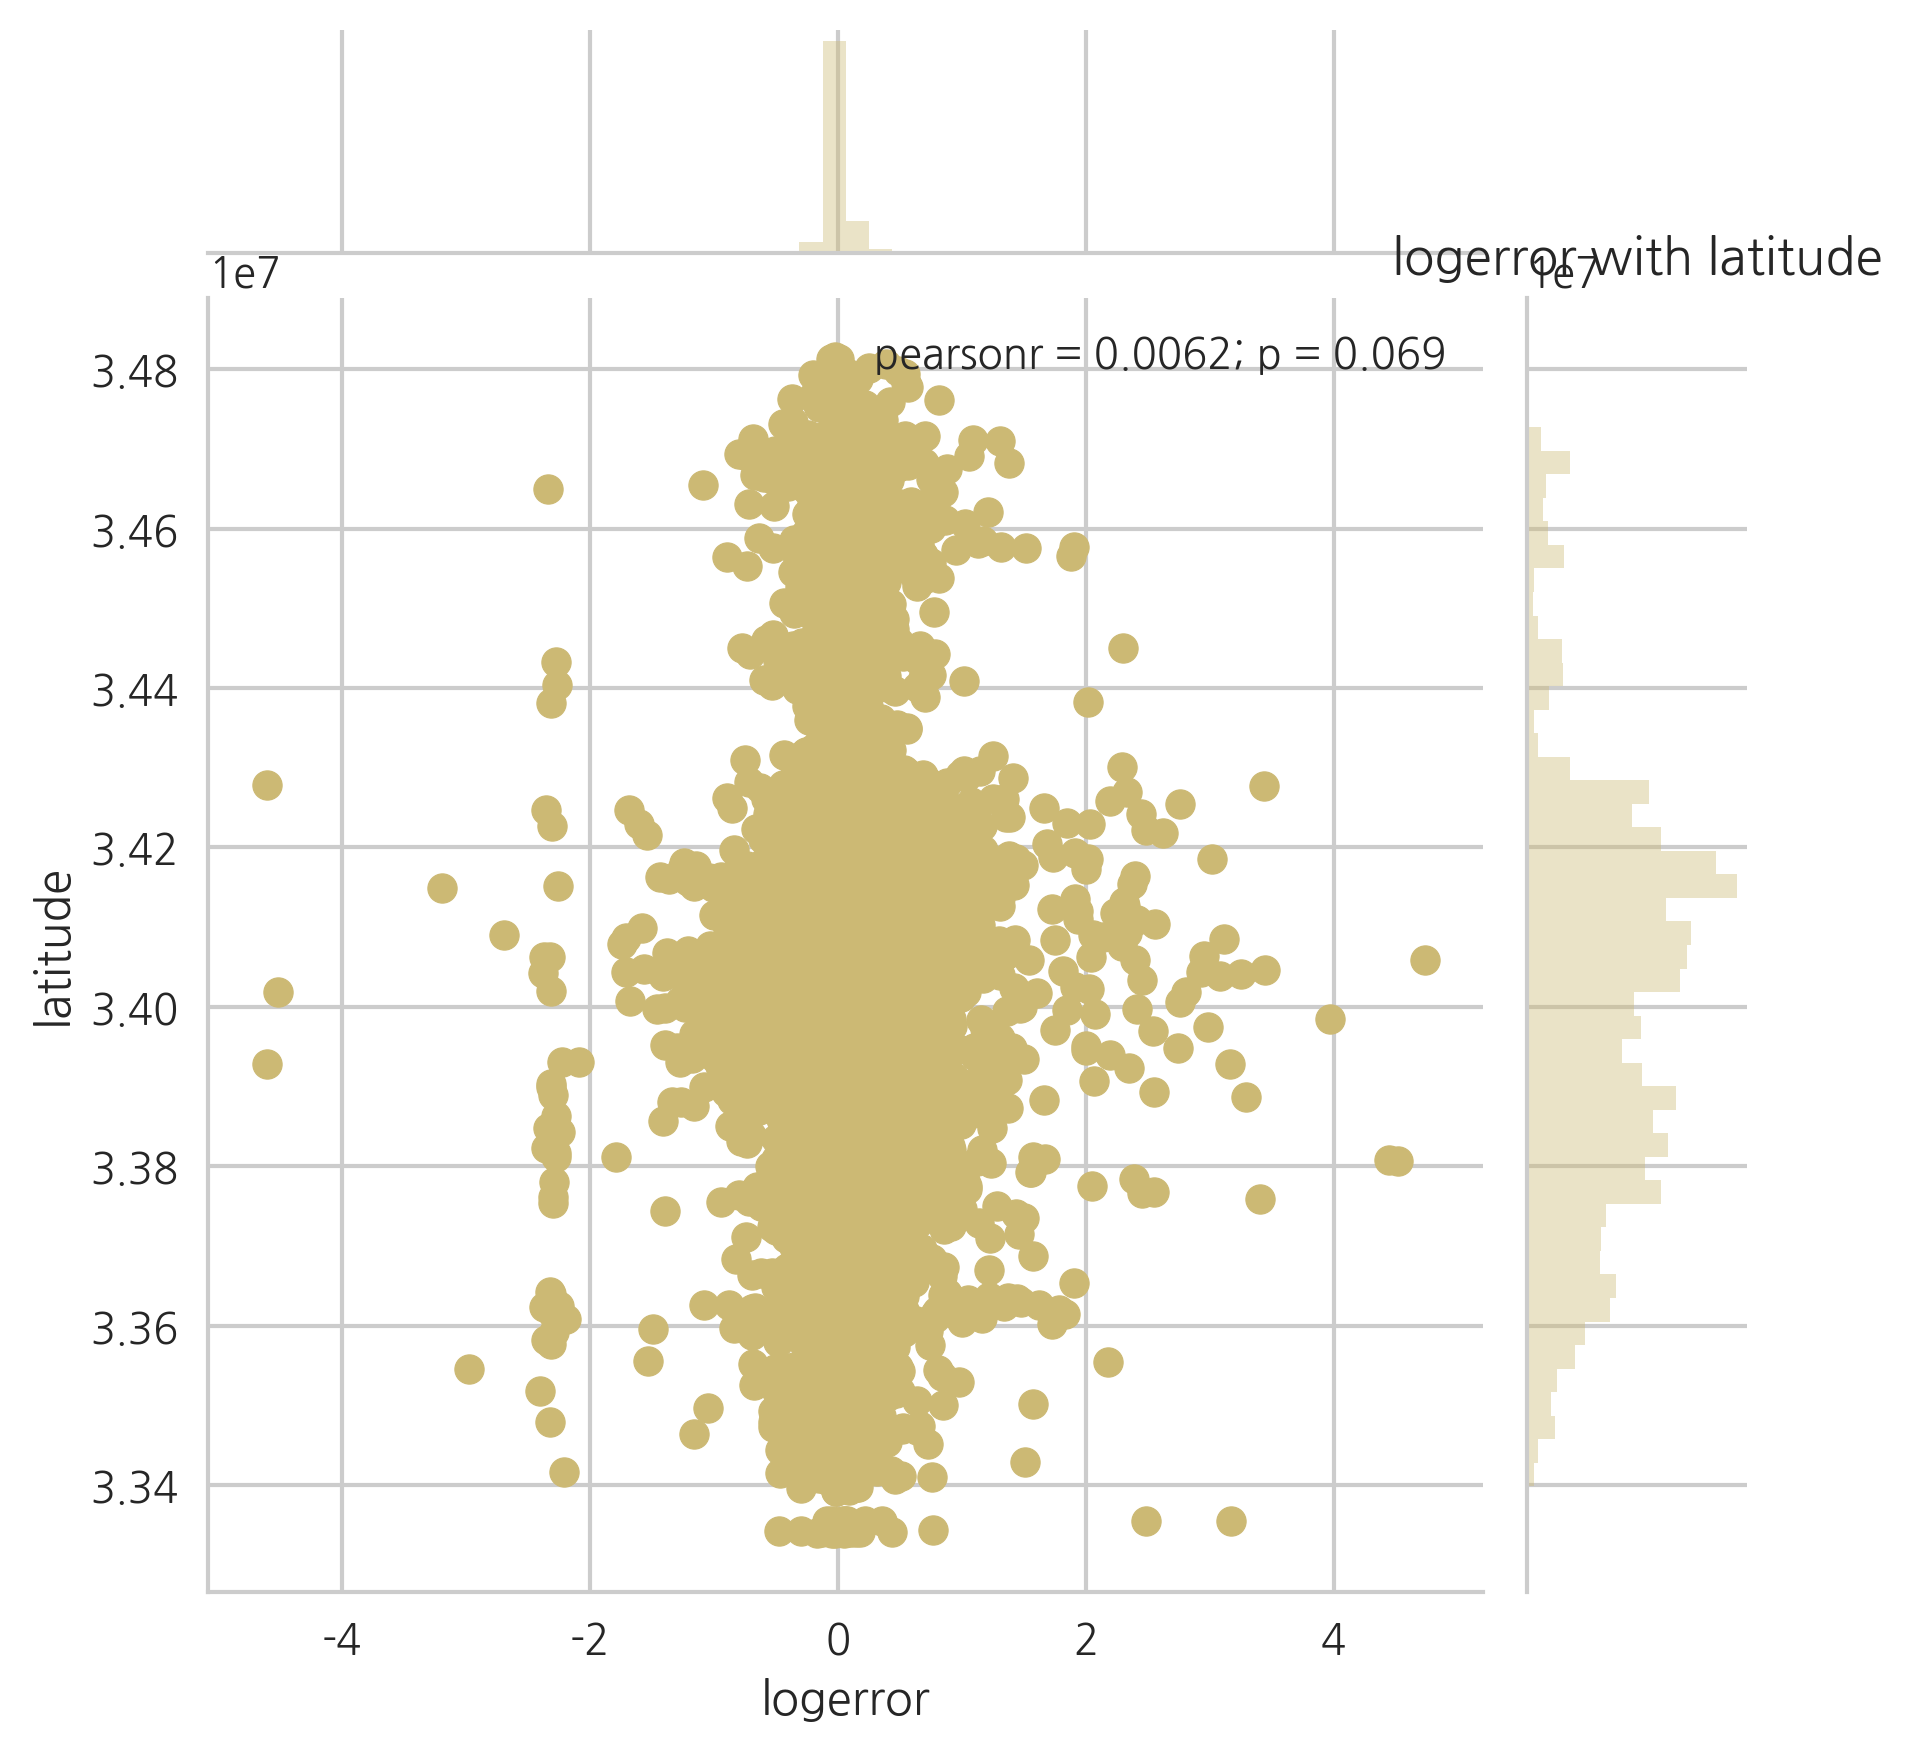

In [ ]:
num = 1
num2 = len(numeric)
c = "bgry"
for x in numeric:
    n = num % 4
    plt.figure(figsize=(5, 50))
    #plt.subplot(num2, 1, num)
    sns.jointplot(df_train3["logerror"], df_train3[x], color=c[n])
    plt.title("logerror with " + x)
    num += 1    